In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [5]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# Colour palette for categorical data
cat_palette = sns.color_palette("Set3")
cat_palette

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

# Exploring columns

In [7]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

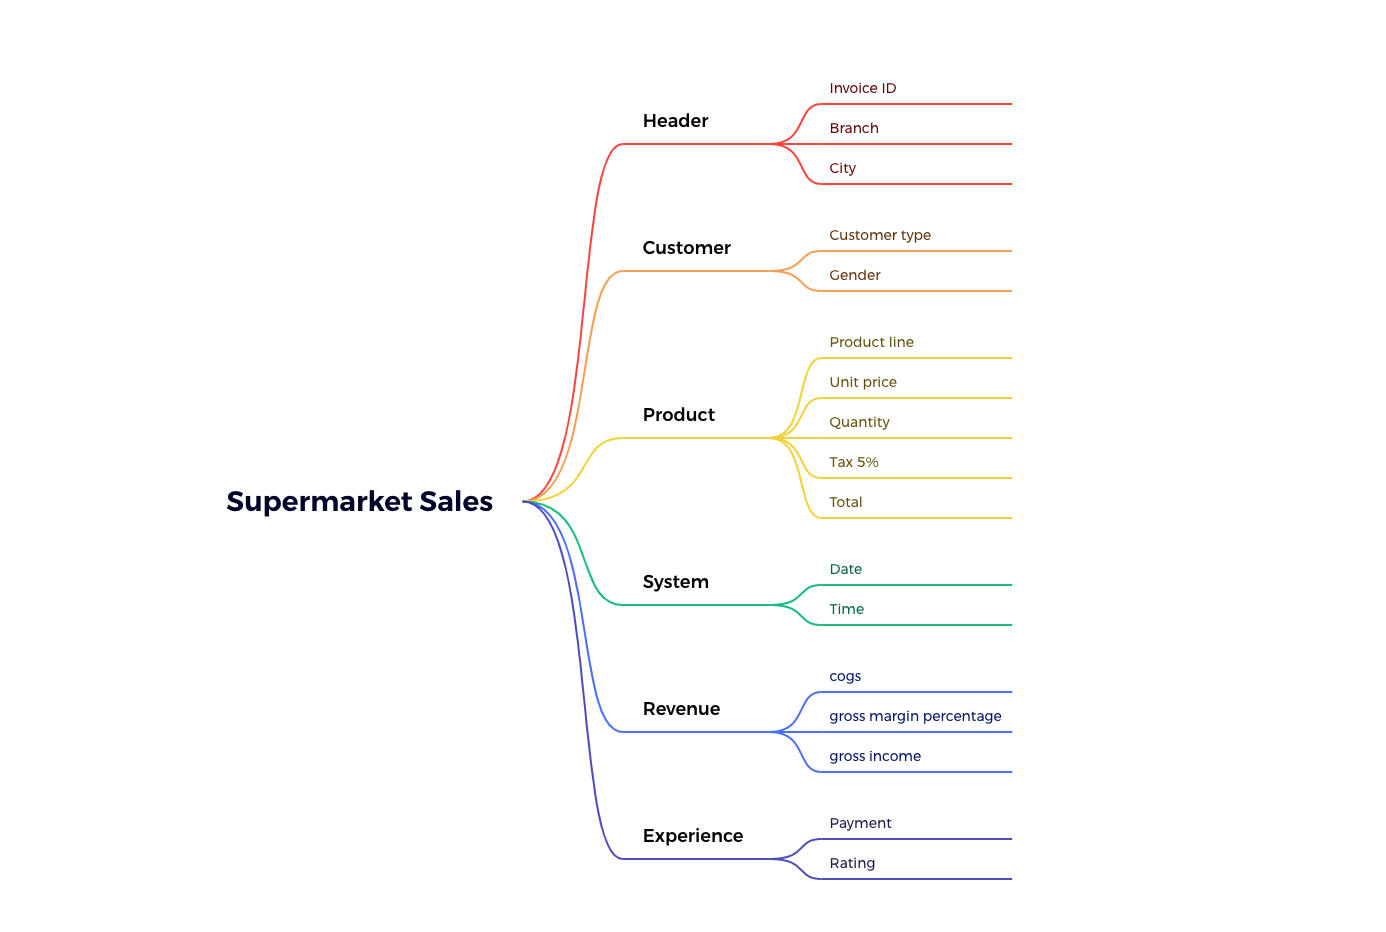

In [8]:
df.describe().round(2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In [9]:
#Checking for null values
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
def explore_columns(df):
    the_cols = ["Invoice ID", "Branch", "City", "Customer type", "Gender", "Product line", "Payment"]
    for i in the_cols:
        # when values are unique
        print("\n",i,"\n")
        if df[i].count() == df[i].nunique():
            print("Unique")
            print("Min",df[i].min())
            print("Max",df[i].max())
            print(df[i].isnull().sum())
        # when values are not unique
        else:
            print("Null Count:",df[i].isnull().sum())
            print(df[i].value_counts())
            #print(df[i].value_counts(normalize=True)*100)
    return 0

In [11]:
explore_columns(df)


 Invoice ID 

Unique
Min 101-17-6199
Max 898-04-2717
0

 Branch 

Null Count: 0
A    340
B    332
C    328
Name: Branch, dtype: int64

 City 

Null Count: 0
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

 Customer type 

Null Count: 0
Member    501
Normal    499
Name: Customer type, dtype: int64

 Gender 

Null Count: 0
Female    501
Male      499
Name: Gender, dtype: int64

 Product line 

Null Count: 0
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

 Payment 

Null Count: 0
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


0

# Price and Revenue equations

In [12]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


cogs = Unit price * Quantity

Tax 5% = cogs * 5/ 100

Total = cogs + Tax 5%

gross income = Total * gross margin percentage/ 100 


In [13]:
#Checking whether all gross margin percentages are same

df["gross margin percentage"].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

All products have the same gross margin percentage

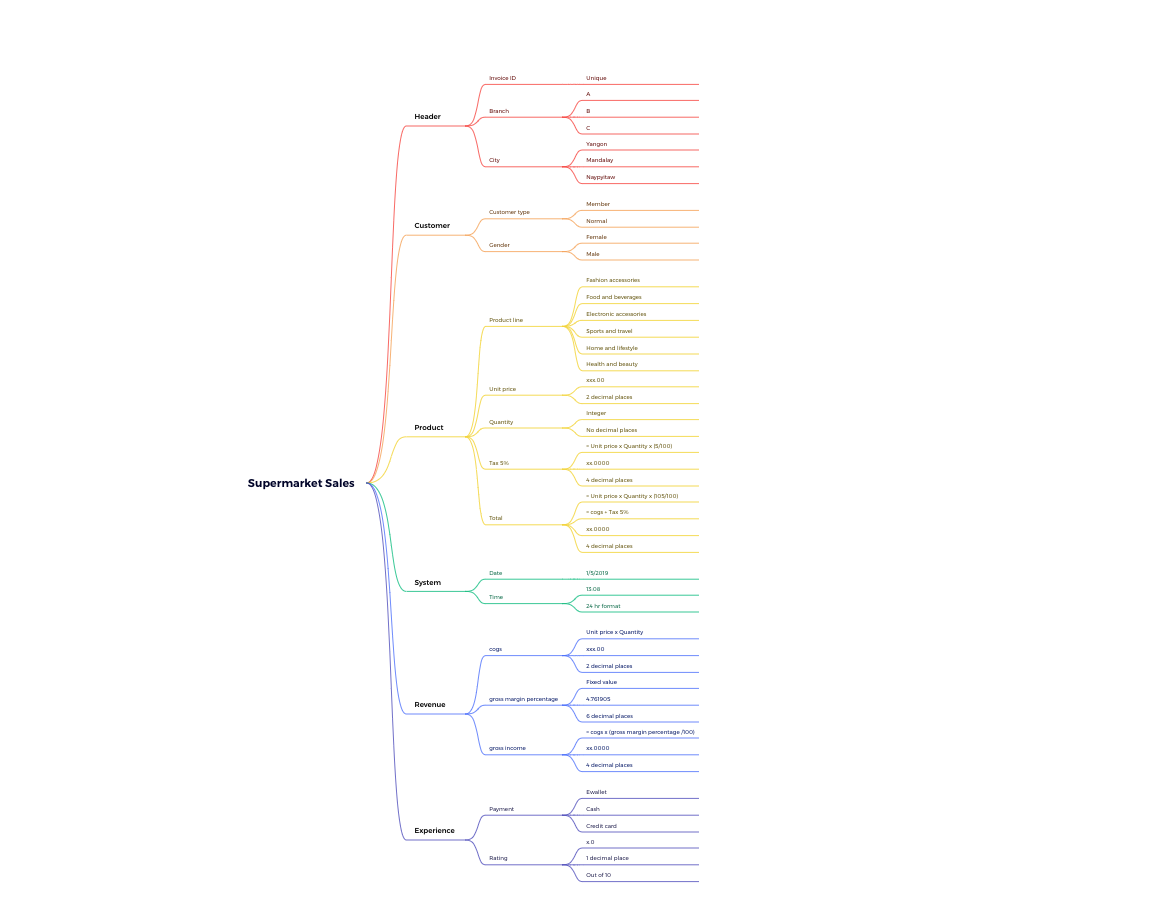

# Questions

<h3> Data : </h3> 

1. Do products of the same product line have the same unit price? 

2. Which City/ Branch sold the highest quantity of products? 

3. Which City/Branch earned the highest gross income?

4. Gross income by product line

5. Gross income by product line by City/Branch 

6. Total revenue by payment type


<h3> Behavioural </h3>

7. Men are more likely to purchase high price low quantity products. /Gender vs quantity vs unit price
 
* Gender vs product-line vs Total

* Members are more likely to purchase higher priced products than non members.
- Customer type vs price unit vs Total

* Gender vs Payment type vs Total

* Gender vs Customer type vs Total vs Payment type vs Rating

<h3> Time series and Date/Time related </h3>

8. Revenue fluctuation over time (datetime)

9. When (time, month, day) are people more likely to make purchases? Higher revenue

<h3> KPI/Persona </h3>

* Target customer description

* Target product description

* Total sales by hour/day/week/month/quater/year

* Average gross income or Average net income

* gross income/ cogs

* Member purchases over time

# Data Questions

## 1. Does products of the same product line have the same unit price?

In [14]:
df2 = df.groupby(["Product line", "Unit price"])[[ "Unit price"]].count()
df2

Unit price
Product line           Unit price            
Electronic accessories 10.56                1
                       10.59                1
                       11.81                1
                       11.94                1
                       12.05                1
...                                       ...
Sports and travel      98.13                1
                       98.40                1
                       98.80                1
                       99.24                1
                       99.96                1

[993 rows x 1 columns]

In [15]:
df2["Unit price"].value_counts()

1    986
2      7
Name: Unit price, dtype: int64

In [16]:
df2["Unit price"].value_counts(normalize = True).round(2)*100

1    99.0
2     1.0
Name: Unit price, dtype: float64

In [17]:
df2.loc[df2["Unit price"] > 1]["Unit price"].value_counts

<bound method IndexOpsMixin.value_counts of Product line            Unit price
Electronic accessories  26.26         2
                        52.89         2
Fashion accessories     22.32         2
                        99.82         2
Home and lifestyle      34.42         2
                        78.38         2
Sports and travel       45.58         2
Name: Unit price, dtype: int64>

1. Products of the same product line have different prices. >> One product line does not represent one product.

2. Since each invoice only has one unit price, all extracted invoices are of monotypic product sales.

2. In the selected dataset 99% of the products have unique unit prices. Only 1% are repeated prices. 

3. Since most items have unique unit prices one could say for each unique product most of the time (99% of the time)only one invoice was extracted from sales of that specific product. 

4. *There is a possibility that *all* of the products in the dataset are unique and the 1% of the time where the unit price is repeated may be due to more than one product bearing the same price.*  


** Maybe this dataset is a subset of all the sales made at each store. 

** i.e.: For each store, extract one invoice where the customer bought only one type of product( Qty can be many) and product unit price is unique. 

In [18]:
#unit_price_by_branch_prodline = df3
df3 = df.groupby(["Product line", "Branch", "Unit price"])[[ "Unit price"]].count()
df3 
df3["Unit price"].value_counts()

1    990
2      5
Name: Unit price, dtype: int64

In [19]:
df3["Unit price"].value_counts(normalize=True)*100

1    99.497487
2     0.502513
Name: Unit price, dtype: float64

## 2. Which City/ Branch sold the highest quantity of products? 

In [20]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [21]:
quantity_by_city = df.groupby("City")[["Quantity"]].sum()
quantity_by_city

,Quantity
City,
Mandalay,1820
Naypyitaw,1831
Yangon,1859


* Sales quantities are almost equally divided among the three cities/branches.

## 3. Which City/Branch earned the highest gross income?

In [22]:
grossincome_by_city = df.groupby("City")[["gross income"]].sum()
grossincome_by_city

,gross income
City,
Mandalay,5057.0320
Naypyitaw,5265.1765
Yangon,5057.1605


In [23]:
grossincome_by_city.reset_index(inplace = True)

In [24]:
grossincome_by_city["gross tot income %"] = (grossincome_by_city["gross income"]/grossincome_by_city["gross income"].sum()).round(2) * 100


<AxesSubplot: xlabel='gross income', ylabel='City'>

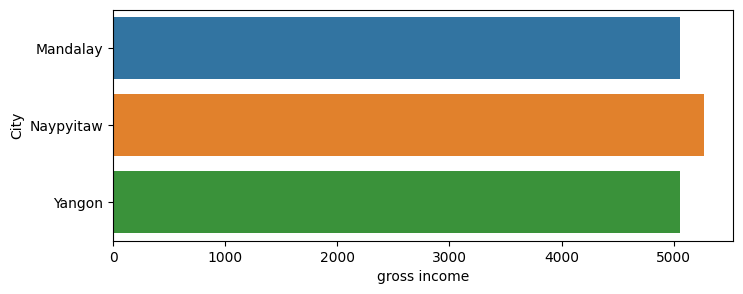

In [25]:
fig = plt.figure(figsize=(8, 3))
sns.barplot(data = grossincome_by_city, y = "City" , x = "gross income")

<AxesSubplot: xlabel='gross tot income %', ylabel='City'>

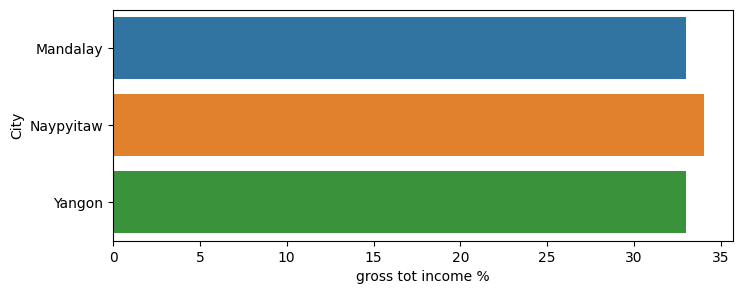

In [26]:
fig = plt.figure(figsize=(8, 3))
sns.barplot(data = grossincome_by_city, y = "City" , x = "gross tot income %")

In [27]:
grossincome_by_city

,City,gross income,gross tot income %
0,Mandalay,5057.0320,33.0
1,Naypyitaw,5265.1765,34.0
2,Yangon,5057.1605,33.0


* Total gross income is also almost equal in the three cities/branches. 

* Only Naypyitaw has a slight increase of ~208 (1%)


## 4. Gross income by product line

In [28]:
grossincome_by_productline = df.groupby("Product line")[["gross income"]].sum()
grossincome_by_productline
grossincome_by_productline["gross tot income %"] = (grossincome_by_productline["gross income"]/grossincome_by_productline["gross income"].sum()).round(2) * 100
grossincome_by_productline

,gross income,gross tot income %
Product line,,
Electronic accessories,2587.5015,17.0
Fashion accessories,2585.9950,17.0
Food and beverages,2673.5640,17.0
Health and beauty,2342.5590,15.0
Home and lifestyle,2564.8530,17.0
Sports and travel,2624.8965,17.0


In [29]:
grossincome_by_productline.reset_index(inplace= True)

In [30]:
grossincome_by_productline["gross income"].mean().round(4)

2563.2282

<AxesSubplot: xlabel='gross tot income %', ylabel='Product line'>

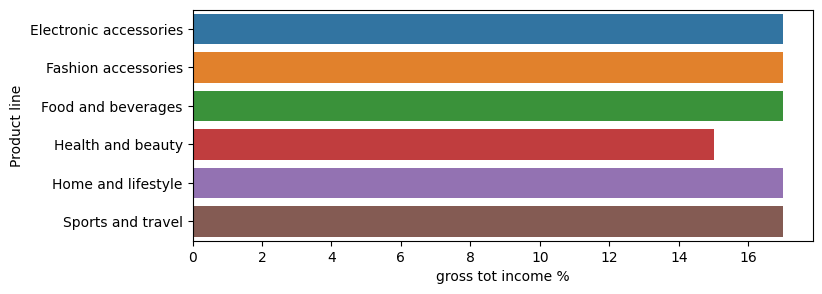

In [31]:
grossincome_by_productline
fig = plt.figure(figsize=(8, 3))
sns.barplot(data = grossincome_by_productline, y = "Product line" , x = "gross tot income %")

* Gross income percentage of each product line is around 17% 
* "Health and beauty" is considerably below average  (15%) 

## 5. Gross income by product line by City/Branch 

In [32]:
ginc_productln_city = df.groupby(["Product line","City"])[["gross income"]].sum()
ginc_productln_city

ginc_productln_city= ginc_productln_city.reset_index()
ginc_productln_city

,Product line,City,gross income
0,Electronic accessories,Mandalay,811.9735
1,Electronic accessories,Naypyitaw,903.2845
2,Electronic accessories,Yangon,872.2435
3,Fashion accessories,Mandalay,781.5865
4,Fashion accessories,Naypyitaw,1026.6700
5,Fashion accessories,Yangon,777.7385
6,Food and beverages,Mandalay,724.5185
7,Food and beverages,Naypyitaw,1131.7550
8,Food and beverages,Yangon,817.2905
9,Health and beauty,Mandalay,951.4600


sns.barplot(
    data = ginc_productln_city, 
    y = "Product line" , 
    x = "gross income", 
    hue = "City", 
    #kind="bar",
    palette = cat_palette
)

[Text(0.5, 1.0, '\nYangon total gross income by Product line')]

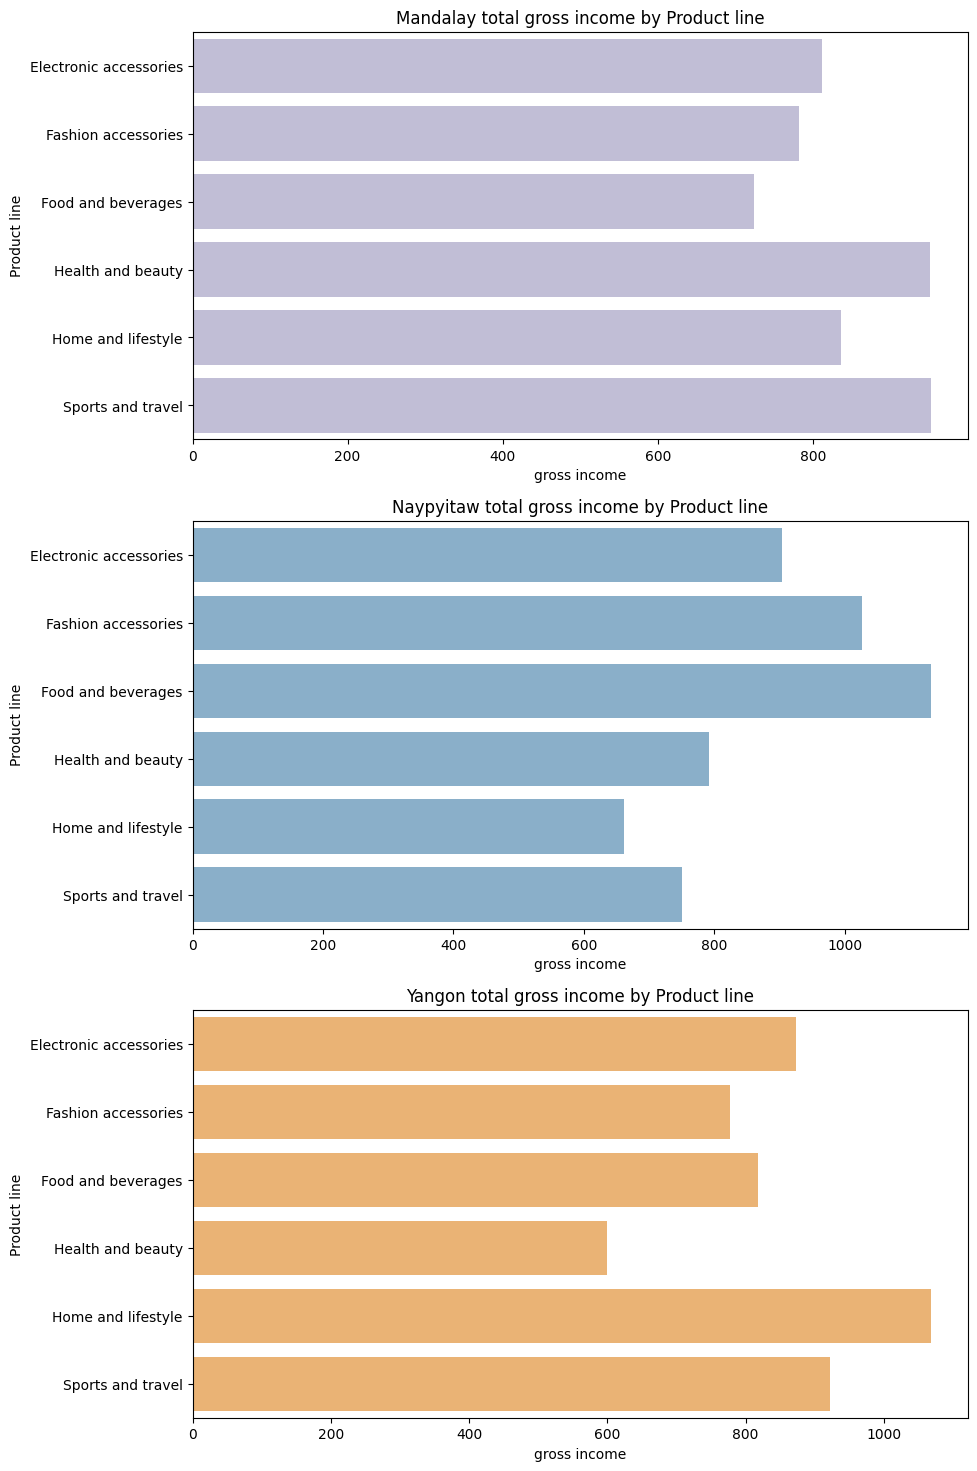

In [33]:
mandalay = ginc_productln_city.loc[ginc_productln_city["City"] == "Mandalay"]
naypyitaw = ginc_productln_city.loc[ginc_productln_city["City"] == "Naypyitaw"]
yangon = ginc_productln_city.loc[ginc_productln_city["City"] == "Yangon"]

fig = plt.figure(figsize=(10, 18))
spec = fig.add_gridspec(ncols=1, nrows=3)


ax00 = fig.add_subplot(spec[0, 0])
sns.barplot(data = mandalay , y = "Product line" , x = "gross income", color = cat_palette[2], ax=ax00).set(
    title = "Mandalay total gross income by Product line")
ax10 = fig.add_subplot(spec[1, 0])
sns.barplot(data = naypyitaw , y = "Product line" , x = "gross income", color = cat_palette[4], ax=ax10).set(
    title = "\n\nNaypyitaw total gross income by Product line")
ax20 = fig.add_subplot(spec[2, 0])
sns.barplot(data = yangon , y = "Product line" , x = "gross income", color = cat_palette[5], ax=ax20).set(
    title = "\nYangon total gross income by Product line")


[Text(0.5, 1.0, '\nYangon percentage gross income by Product line')]

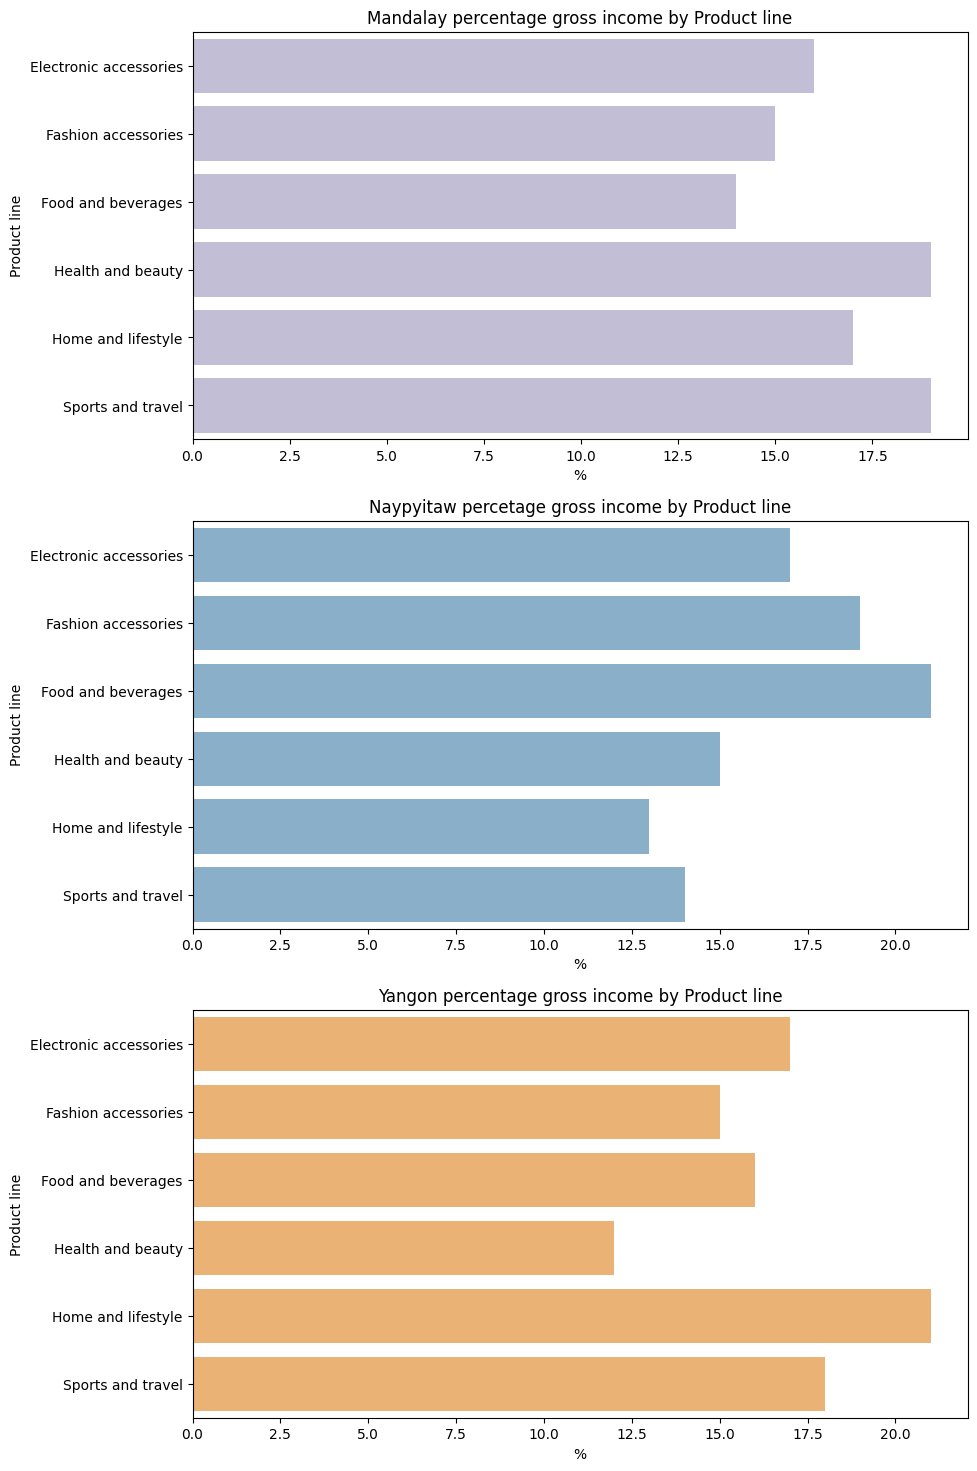

In [34]:
mandalay = mandalay.copy()
mandalay["%"]= ((mandalay["gross income"]/ mandalay["gross income"].sum())* 100 ).round(0)
naypyitaw = naypyitaw.copy()
naypyitaw["%"]= ((naypyitaw["gross income"]/ naypyitaw["gross income"].sum())* 100 ).round(0)
yangon = ginc_productln_city.loc[ginc_productln_city["City"] == "Yangon"]
yangon = yangon.copy()
yangon["%"]= ((yangon["gross income"]/ yangon["gross income"].sum())* 100 ).round(0)

fig = plt.figure(figsize=(10, 18))
spec = fig.add_gridspec(ncols=1, nrows=3)


ax00 = fig.add_subplot(spec[0, 0])
sns.barplot(data = mandalay , y = "Product line" , x = "%", color = cat_palette[2], ax=ax00).set(
    title = "Mandalay percentage gross income by Product line")
ax10 = fig.add_subplot(spec[1, 0])
sns.barplot(data = naypyitaw , y = "Product line" , x = "%", color = cat_palette[4], ax=ax10).set(
    title = "\n\nNaypyitaw percetage gross income by Product line")
ax20 = fig.add_subplot(spec[2, 0])
sns.barplot(data = yangon , y = "Product line" , x = "%", color = cat_palette[5], ax=ax20).set(
    title = "\nYangon percentage gross income by Product line")


* Both total gross income and the percentage gross income of each product line when isolated by the city shows a considerable variance. 


## 6. Total revenue by payment type

In [35]:
df.head(3)
# Gross total income grouped by Payment. Maybe groupby the City too
revenue_by_payment = df.groupby("Payment")[["gross income"]].sum()
revenue_by_payment.reset_index(inplace=True)
revenue_by_payment

,Payment,gross income
0,Cash,5343.170
1,Credit card,4798.432
2,Ewallet,5237.767


In [36]:
max_min = (revenue_by_payment["gross income"].max() - revenue_by_payment["gross income"].min()
).round(4)
print("Max-Min difference: ",max_min)
print("Max-Min diff percentage: ", ((max_min/revenue_by_payment["gross income"].sum())*100).round(4))
print("Average: ", revenue_by_payment["gross income"].mean().round(4))
print("SD: ", revenue_by_payment["gross income"].std().round(4))

Max-Min difference:  544.738
Max-Min diff percentage:  3.542
Average:  5126.4563
SD:  288.9246


In [37]:
revenue_by_payment["perc"]=(revenue_by_payment["gross income"]/revenue_by_payment["gross income"].sum())* 100
revenue_by_payment

,Payment,gross income,perc
0,Cash,5343.170,34.742453
1,Credit card,4798.432,31.200448
2,Ewallet,5237.767,34.057099


<AxesSubplot: xlabel='Payment', ylabel='gross income'>

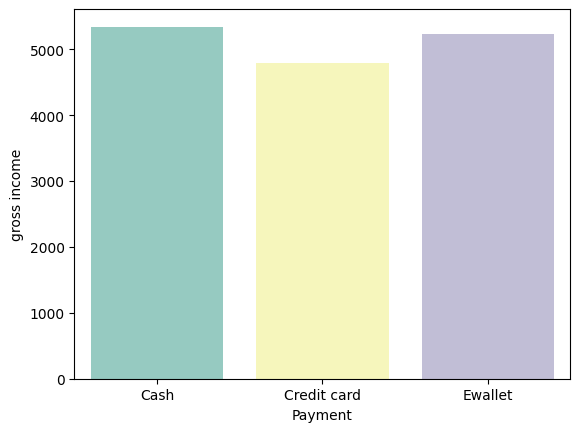

In [38]:
sns.barplot(data = revenue_by_payment, x = "Payment", y = "gross income", palette = cat_palette)

* There is relatively low amount of credit card revenue compared to Ewallet and Cash. About 3% less

In [39]:
# Gross total income grouped by Payment in each city
revenue_by_payment_city = df.groupby(["Payment", "City"])[["gross income"]].sum()
revenue_by_payment_city.reset_index(inplace=True)
revenue_by_payment_city

,Payment,City,gross income
0,Cash,Mandalay,1682.8315
1,Cash,Naypyitaw,2051.7075
2,Cash,Yangon,1608.6310
3,Credit card,Mandalay,1778.3265
4,Credit card,Naypyitaw,1444.1650
5,Credit card,Yangon,1575.9405
6,Ewallet,Mandalay,1595.8740
7,Ewallet,Naypyitaw,1769.3040
8,Ewallet,Yangon,1872.5890


<AxesSubplot: xlabel='City', ylabel='gross income'>

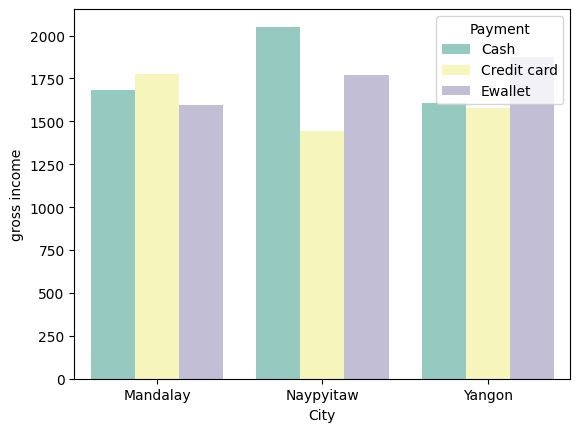

In [40]:
sns.barplot(data = revenue_by_payment_city, x = "City", y = "gross income", hue = "Payment", palette = cat_palette)

* Mandalay has highest revenue through credit card payments. This is only a small increased relative to the other payment methods. Lowest in Mandalay is Ewallet.

* Naypytiw has highest revenue through cash payments. This is significantly higher than other methods.The lowest method of revenue in Naypyitaw is through credit card.

* Yangon has highest revenue through Ewallet. The other methods seem to have relatively equi amounts.

# Behaviour Questions

## 7. Men are more likely to purchase high price low quantity products.

*Gender vs Quantity vs Unit price*

In [41]:
# Gender vs quantity vs unit price 
gender_qty_price_wocity = df.groupby("Gender")[[ "Unit price", "Quantity"]].mean()
gender_qty_price_wocity.reset_index(inplace = True)
gender_qty_price_wocity

,Gender,Unit price,Quantity
0,Female,55.263952,5.726547
1,Male,56.081944,5.292585


In [42]:
#the diff of avg quantity
(gender_qty_price_wocity.Quantity.max() - gender_qty_price_wocity.Quantity.min()).round(2)

0.43

In [43]:
#the diff of avg unit price
(gender_qty_price_wocity["Unit price"].max() - gender_qty_price_wocity["Unit price"].min()).round(2)

0.82

[Text(0.5, 1.0, 'Average sales quantity by gender')]

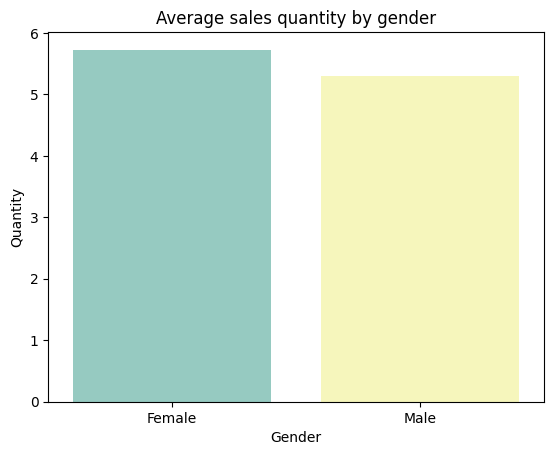

In [44]:
sns.barplot(data = gender_qty_price_wocity, x = "Gender", y = "Quantity", palette = cat_palette).set(
    title='Average sales quantity by gender')

[Text(0.5, 1.0, 'Average Unit price grouped by gender')]

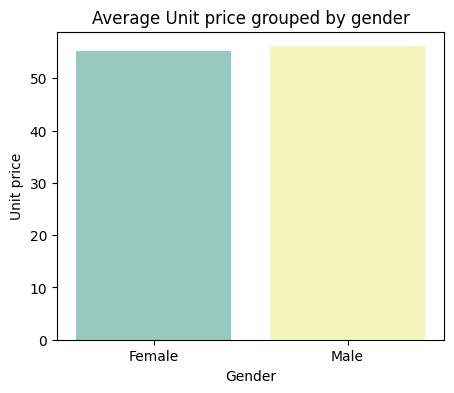

In [45]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(data = gender_qty_price_wocity, x = "Gender", y = "Unit price", palette = cat_palette, ax = ax).set(
    title='Average Unit price grouped by gender')

*Gender vs Quantity vs Unit price by City*

In [46]:
# Gender vs quantity vs unit price + City
gender_qty_price = df.groupby(["Gender","City"])[[ "Unit price", "Quantity"]].mean()
gender_qty_price.reset_index(inplace=True)

In [47]:
gender_qty_price

,Gender,City,Unit price,Quantity
0,Female,Mandalay,54.168148,5.623457
1,Female,Naypyitaw,55.517584,5.893258
2,Female,Yangon,56.086149,5.645963
3,Male,Mandalay,57.080235,5.347059
4,Male,Naypyitaw,57.904200,5.213333
5,Male,Yangon,53.606816,5.307263


In [48]:
temp_diff = gender_qty_price.loc[gender_qty_price["City"] == "Naypyitaw"][["Quantity"]]
(temp_diff.max() - temp_diff.min()).round(2)

Quantity    0.68
dtype: float64

[Text(0.5, 1.0, 'Average sales quantity by city and gender')]

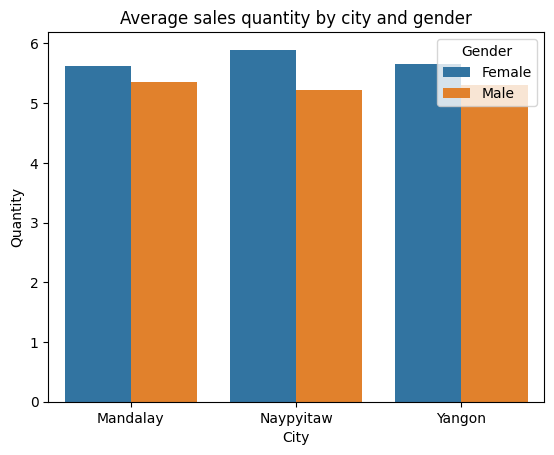

In [49]:
sns.barplot(data = gender_qty_price, x = "City", y = "Quantity", hue = "Gender").set(
    title='Average sales quantity by city and gender')


[Text(0.5, 1.0, 'Average Unit price grouped by city and gender')]

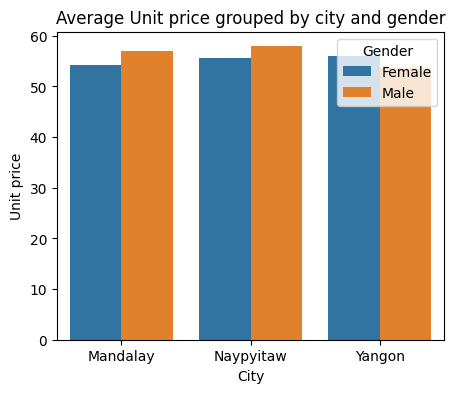

In [50]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(data = gender_qty_price, x = "City", y = "Unit price", hue = "Gender", ax = ax).set(
    title='Average Unit price grouped by city and gender')

When average quantity and average unit price is considered against gender for all records;
   
* Average sales quantity by females is slightly higher than males, a difference of just 0.43
    
* Average unit price of sales by males is slightly higher than females, a difference of just 0.82

When average quantity and average unit price is considered against gender for records grouped by cities/supermarket branches;

* The differences are more visible. eg: In Naypyitaw average sales quantity has a considerable gap between males and females.  (0.68, compared to 0.43 overall value)

* Some cities show opposite patterns to overall pattern. eg: In Yangon average unit price sales by females is higher than males.

## 10. Gender vs product-line vs Total

In [51]:
gender_prod_income = df.groupby(["Gender","Product line"])[[ "Unit price", "Quantity", "gross income"]].agg(["mean", "sum"])
gender_prod_income
gender_prod_income.reset_index(inplace = True)
gender_prod_income

Gender            Product line Unit price           Quantity       \
                                         mean      sum      mean  sum   
0   Female  Electronic accessories  52.051548  4372.33  5.809524  488   
1   Female     Fashion accessories  55.526979  5330.59  5.520833  530   
2   Female      Food and beverages  60.090333  5408.13  5.711111  514   
3   Female       Health and beauty  51.089219  3269.71  5.359375  343   
4   Female      Home and lifestyle  57.242532  4522.16  6.303797  498   
5   Female       Sports and travel  54.367273  4784.32  5.636364  496   
6     Male  Electronic accessories  55.016744  4731.44  5.616279  483   
7     Male     Fashion accessories  59.058049  4842.76  4.536585  372   
8     Male      Food and beverages  51.635833  4337.41  5.214286  438   
9     Male       Health and beauty  57.592841  5068.17  5.806818  511   
10    Male      Home and lifestyle  53.438889  4328.55  5.098765  413   
11    Male       Sports and travel  59.955897  4676.56  5.435897  424   

   gross income             
           mean        sum  
0     15.363958  1290.5725  
1     15.097917  1449.4000  
2     17.550750  1579.5675  
3     13.810258   883.8565  
4     18.105411  1430.3275  
5     15.462511  1360.7010  
6     15.080570  1296.9290  
7     13.860915  1136.5950  
8     13.023768  1093.9965  
9     16.576165  1458.7025  
10    14.006488  1134.5255  
11    16.207635  1264.1955

In [52]:
gender_prod_income["income per item"] = gender_prod_income["gross income"]["sum"]/gender_prod_income["Quantity"]["sum"]

In [172]:
# a) Total unit price vs Product Line
# b) Average unit price vs Product Line
# c) Total gross income vs Product Line
# d) Average gross income vs Product Line
# e) Total unit price vs Product Line by Gender
# f) Average unit price vs Product Line by Gender
# g) Total quantity vs Product Line by Gender
# h) Average quantity vs Product Line by Gender
# i) Total gross income vs Product Line by Gender
# j) Average gross income vs Product Line by Gender
# k) income per item vs Product Line by Gender

### a) Total unit price vs Product Line

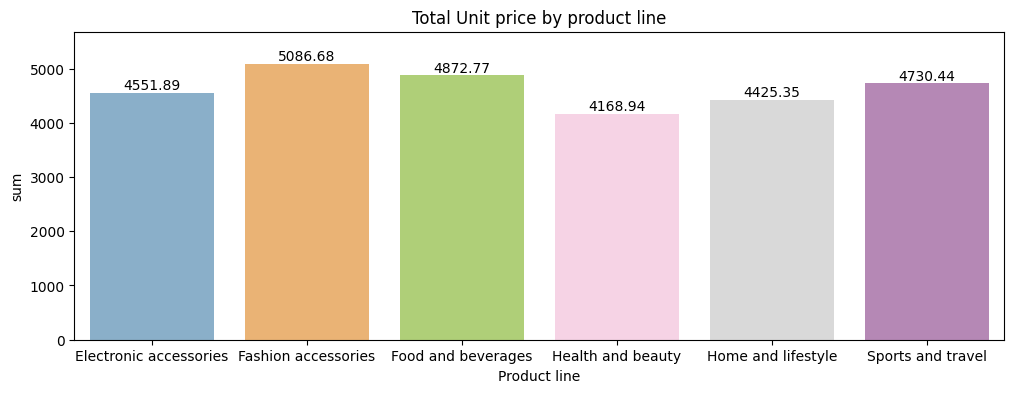

In [156]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(
    data = gender_prod_income, 
    x = "Product line", 
    y = gender_prod_income["Unit price"]["sum"], 
    #hue = "Gender", 
    palette = cat_palette[4:],
    errwidth=0,
    ax = ax).set(
    title='Total Unit price by product line')

for i in ax.containers:
    ax.bar_label(i,)

* Health and beauty product line has the lowest total unit price while Fashion accessories has the highest.

* When considering total unit price by product line, the values of all product lines is within a range of 4168.94 to 5086.68. This is not much of a variation.

### b) Average unit price vs Product Line

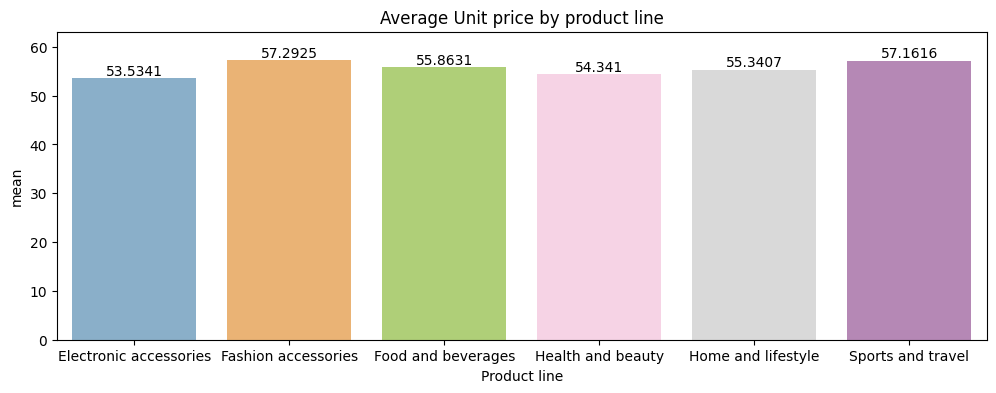

In [160]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(
    data = gender_prod_income, 
    x = "Product line", 
    y = gender_prod_income["Unit price"]["mean"],
    palette = cat_palette[4:],
    errwidth=0,
    ax = ax).set(
    title='Average Unit price by product line')

for i in ax.containers:
    ax.bar_label(i,)

* Electronic accessories product line has the lowest average unit price while Fashion accessories has the highest.

* When considering averages unit price, the values of all product lines is within a range of 53.535 to 57.295. This is not much of a variation.

### c) Total gross income vs Product Line

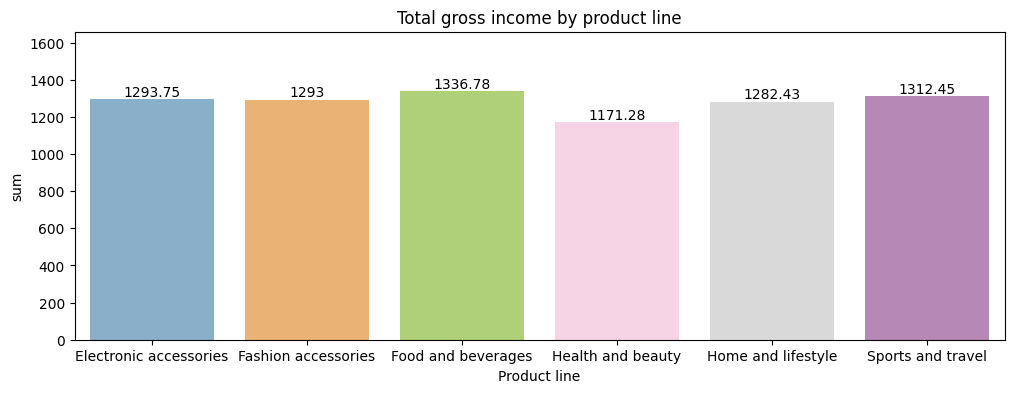

In [161]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(
    data = gender_prod_income, 
    x = "Product line", 
    y = gender_prod_income["gross income"]["sum"], 
    palette = cat_palette[4:],
    errwidth=0,
    ax = ax).set(
    title='Total gross income by product line')

for i in ax.containers:
    ax.bar_label(i,)

* Health and beauty product line has the lowest total gross income while Food and beverages has the highest.

* When considering total gross income, the values of all product lines is within a range of 1171.8 to 1336.78. This is not much of a variation.

### d) Average gross income vs Product Line

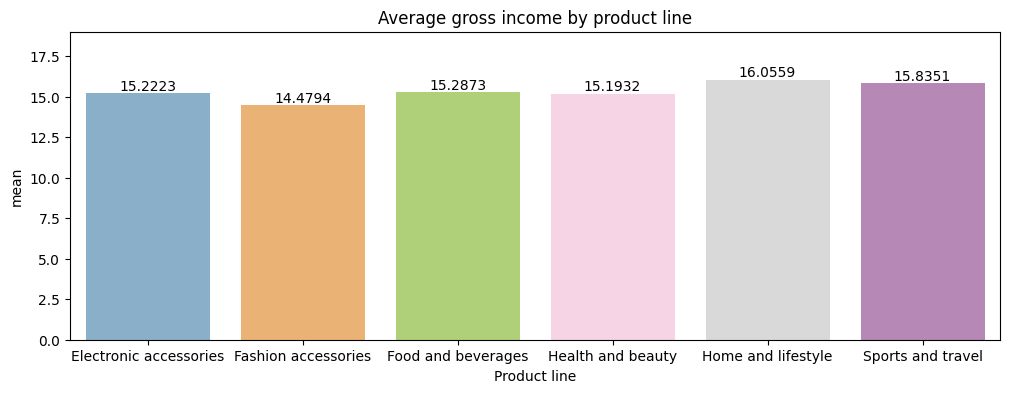

In [162]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(
    data = gender_prod_income, 
    x = "Product line", 
    y = gender_prod_income["gross income"]["mean"], 
    palette = cat_palette[4:],
    errwidth=0,
    ax = ax).set(
    title='Average gross income by product line')

for i in ax.containers:
    ax.bar_label(i,)

* Fashion accessories product line has the lowest average gross income while Home and lifestyle has the highest.

* When considering average gross income, the values of all product lines is within a range of 14.4794 to 16.0559. This is not much of a variation. 

* The totals displayed slightly more variation than the averages. 

### e) Total unit price vs Product Line by Gender

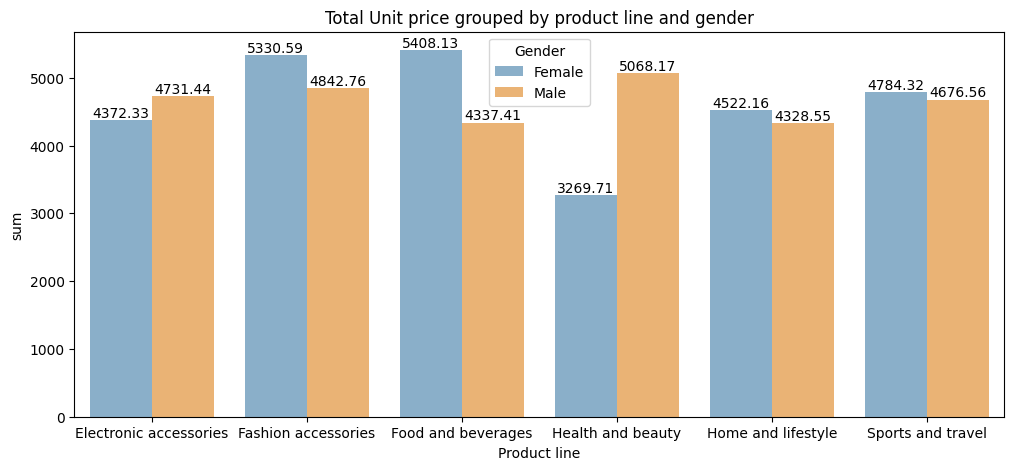

In [168]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(
    data = gender_prod_income, 
    x = "Product line", 
    y = gender_prod_income["Unit price"]["sum"], 
    hue = "Gender", 
    palette = cat_palette[4:],
    ax = ax).set(
    title='Total Unit price grouped by product line and gender')

for i in ax.containers:
    ax.bar_label(i,)

When seperated by gender; 

* The lowest total unit price was for Health and beauty by females (3269.71)

* The highest total unit price was for Food and beverages by females (5408.13)

* The total values range (3269.71 to 5408.13) is slightly larger than the range when not seperated by gender(4168.94 to 5086.68)

* Health and beauty is the product line with the highest gap between male and female totals.

* For most product lines (4/6) the total unit price for females is higher than that of males.

* The two product lines where the average unit price for males is higher are Health and beauty and Electronic accessories

* Health and beauty, Food and beverages displays the largest gaps for product unit prices between the two genders.

### f)  Average unit price vs Product Line by Gender

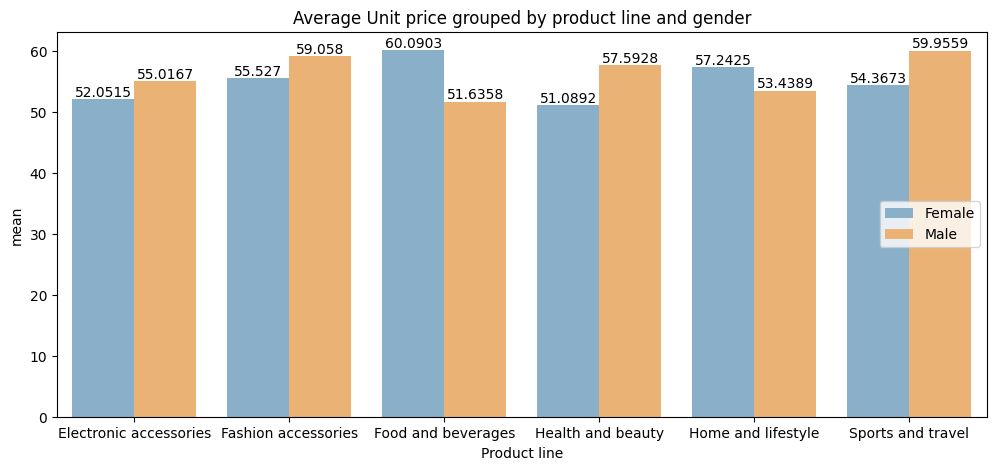

In [171]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(
    data = gender_prod_income, 
    x = "Product line", 
    y = gender_prod_income["Unit price"]["mean"], 
    hue = "Gender", 
    palette = cat_palette[4:],
    ax = ax).set(
    title= "Average Unit price grouped by product line and gender")

plt.legend(loc= "center right")

for i in ax.containers:
    ax.bar_label(i,)

When seperated by gender; 

* The lowest average unit price was for Food and beverages by males (51.6358)

* The highest average unit price was for Food and beverages by females (60.0903)

* The average values range (51.6358 to 60.0903) is slightly larger than the range when not seperated by gender(53.535 to 57.295)

* Food and beverages is the product line with the highest gap between male and female averages.

* For most product lines (4/6) the average unit price for males is higher than that of females.

* The two product lines where the average unit price for females is higher are Food and beverages and Home and lifestyle

* Food and beverages, Sports and travel displays the largest gaps for product unit prices between the two genders.

### g) Total quantity vs Product Line by Gender

[Text(0.5, 1.0, 'Total quantity grouped by product line and gender')]

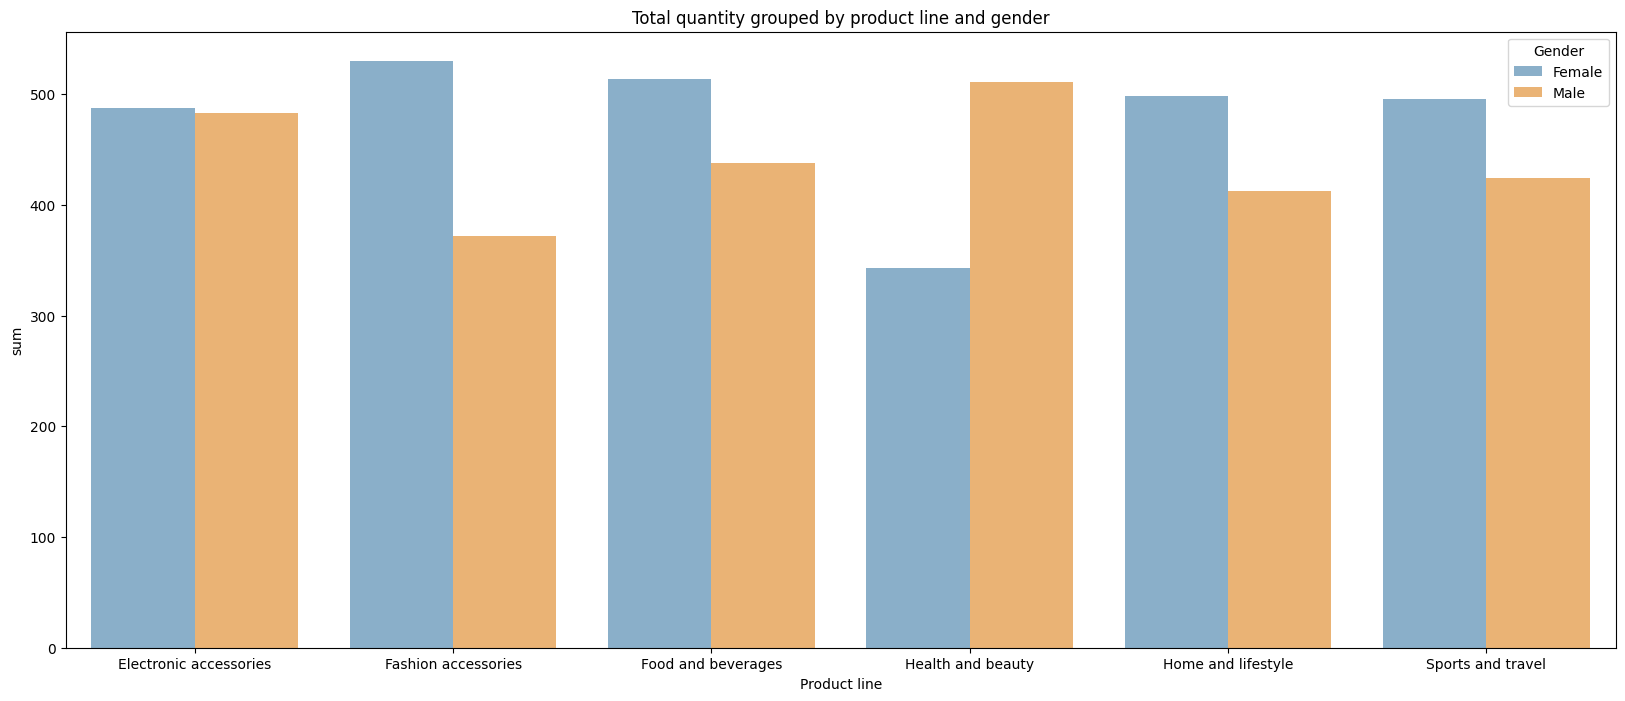

In [56]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
    data = gender_prod_income, 
    x = "Product line", 
    y = gender_prod_income["Quantity"]["sum"], 
    hue = "Gender", 
    palette = cat_palette[4:],
    ax = ax).set(
    title='Total quantity grouped by product line and gender')

### h) Average Quantity vs Product Line by Gender

[Text(0.5, 1.0, 'Average quantity grouped by product line and gender')]

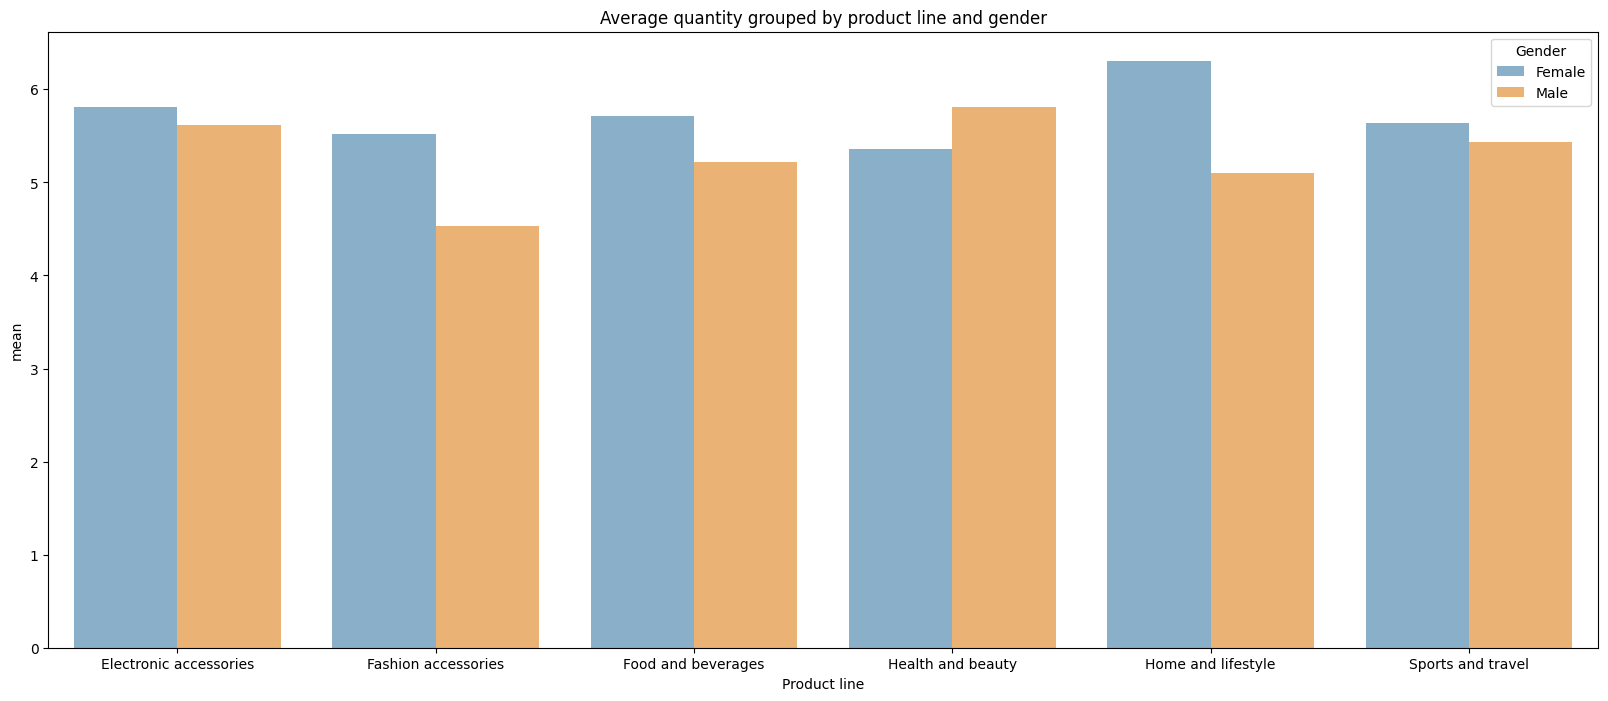

In [55]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
    data = gender_prod_income, 
    x = "Product line", 
    y = gender_prod_income["Quantity"]["mean"], 
    hue = "Gender", 
    palette = cat_palette[4:],
    ax = ax).set(
    title='Average quantity grouped by product line and gender')

### i) Total gross income vs Product Line by Gender

[Text(0.5, 1.0, 'Total gross income grouped by product line and gender')]

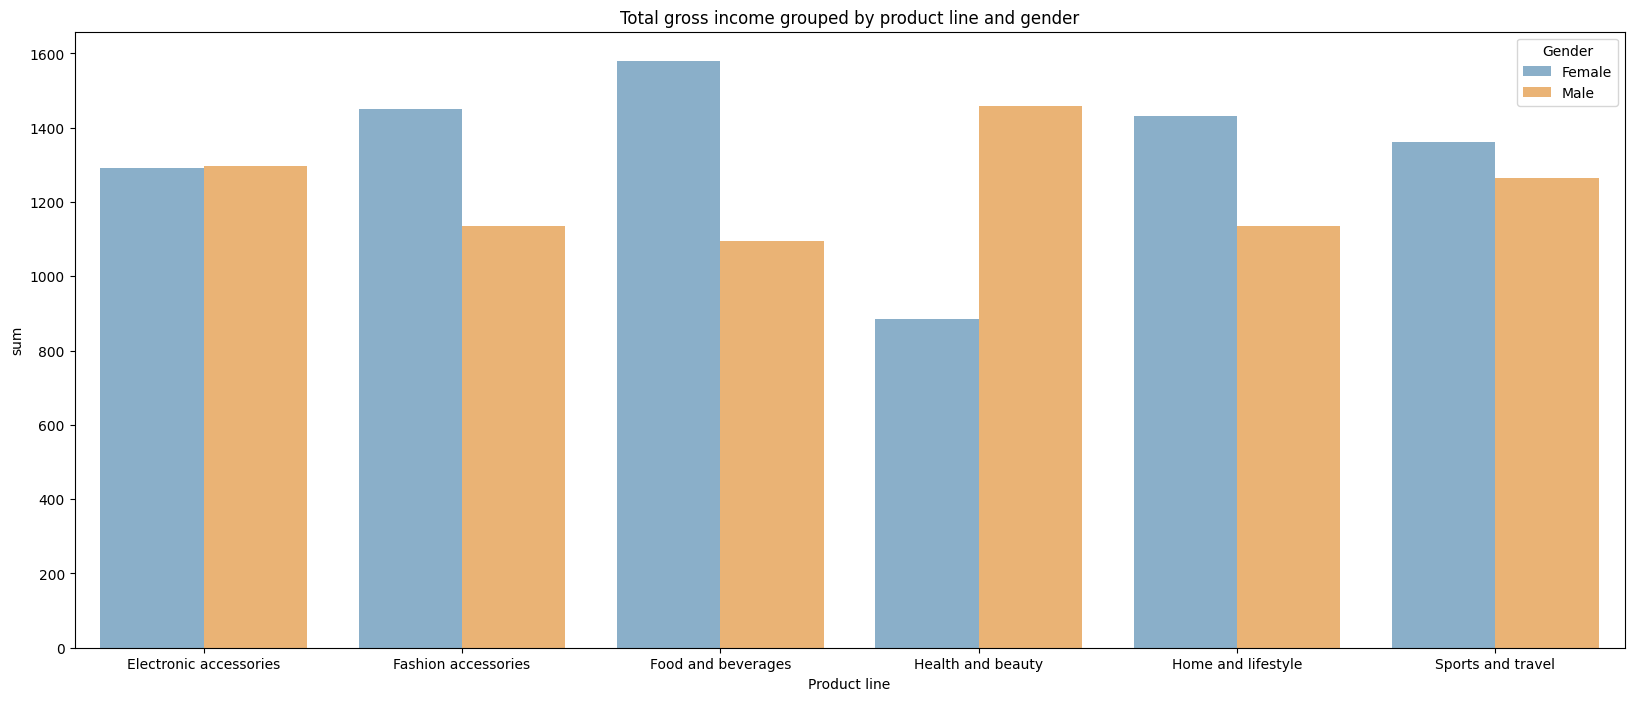

In [58]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
    data = gender_prod_income, 
    x = "Product line", 
    y = gender_prod_income["gross income"]["sum"], 
    hue = "Gender", 
    palette = cat_palette[4:],
    ax = ax).set(
    title='Total gross income grouped by product line and gender')

### j) Average gross income vs Product Line by Gender

[Text(0.5, 1.0, 'Average gross income grouped by product line and gender')]

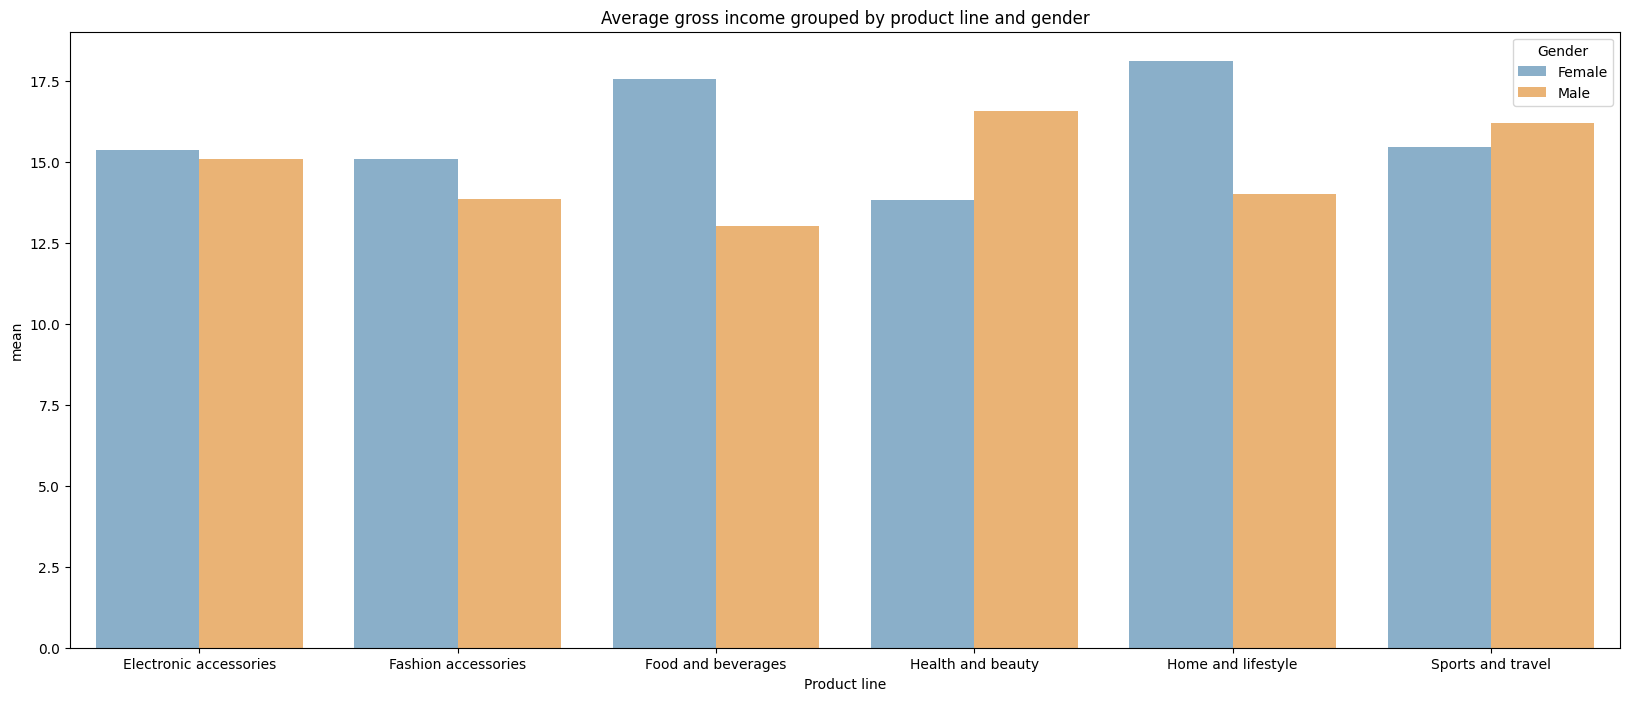

In [57]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
    data = gender_prod_income, 
    x = "Product line", 
    y = gender_prod_income["gross income"]["mean"], 
    hue = "Gender", 
    palette = cat_palette[4:],
    ax = ax).set(
    title='Average gross income grouped by product line and gender')

### k) income per item vs Product Line by Gender

[Text(0.5, 1.0, 'Total income/Total items grouped by product line and gender')]

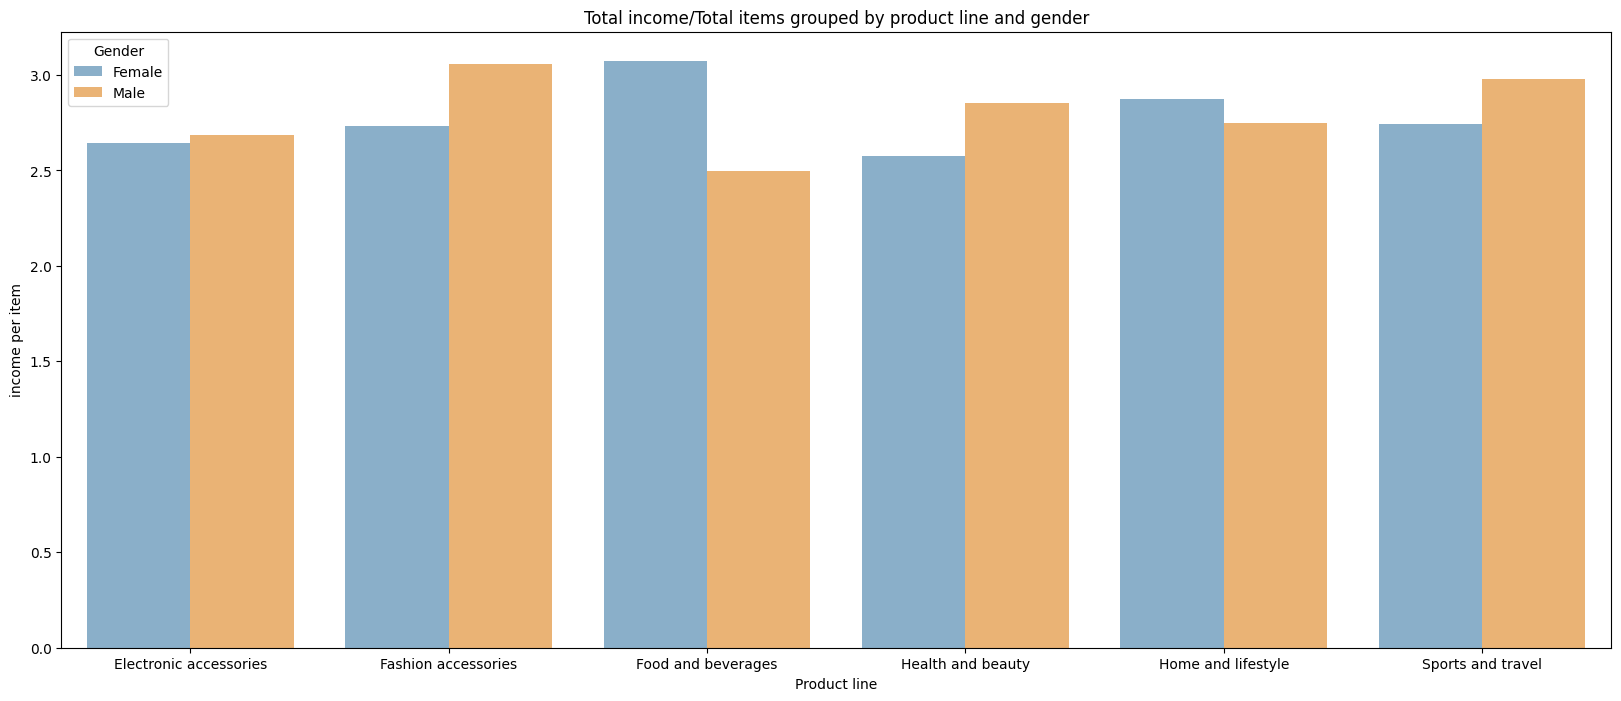

In [59]:
gender_prod_income
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
    data = gender_prod_income, 
    x = "Product line", 
    y = "income per item", 
    hue = "Gender", 
    palette = cat_palette[4:],
    ax = ax).set(
    title='Total income/Total items grouped by product line and gender')

### Other

*** Q: What is better to compare? The average or the sum?

# Time series and Date/Time related Questions

## Date and Time

In [60]:
type(df.Date[1])

str

In [61]:
type(df.Time[1])

str

In [62]:
df.Date.unique()

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

In [63]:
# Date is a string. Format is Month/Date/Year (x/x/xxxx or x/xx/xxxx) 
# Only one character for month. Data from first quater (Jan-Feb-Mar) of year 2019 

In [64]:
df.Time.unique()

array(['13:08', '10:29', '13:23', '20:33', '10:37', '18:30', '14:36',
       '11:38', '17:15', '13:27', '18:07', '17:03', '10:25', '16:48',
       '19:21', '16:19', '11:03', '10:39', '18:00', '15:30', '11:24',
       '10:40', '12:20', '11:15', '17:36', '19:20', '15:31', '12:17',
       '19:48', '15:36', '19:39', '12:43', '14:49', '10:12', '10:42',
       '12:28', '19:15', '17:17', '13:24', '13:01', '18:45', '10:11',
       '13:03', '20:39', '19:47', '17:24', '15:47', '12:45', '17:08',
       '10:19', '15:10', '14:42', '15:46', '11:49', '19:01', '11:26',
       '11:28', '15:55', '20:36', '17:47', '10:55', '13:40', '12:27',
       '14:35', '16:40', '15:43', '15:01', '10:04', '18:50', '12:46',
       '18:17', '18:21', '17:04', '14:20', '15:48', '16:24', '18:56',
       '19:56', '18:37', '10:17', '14:31', '10:23', '20:35', '16:57',
       '17:55', '19:54', '16:42', '12:09', '20:05', '20:38', '13:11',
       '10:16', '18:14', '13:22', '11:27', '16:44', '18:19', '14:50',
       '20:54', '20:

In [65]:
df.Time.min()

'10:00'

In [66]:
df.Time.max()

'20:59'

In [67]:
# Time is a string. 24 hour format. 
# Format is Hour:Minute (hh:mm) 
# Character length for both sections is 2 and fixed. 
# Data from 10:00 h (10.00 AM) until 20.59 (08.59 PM)

# ??? Check whether data spans through all days of the week ?

In [68]:
df_dt = df.copy()
df_dt["date"] = pd.to_datetime(df_dt["Date"])
df_dt.head(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,2019-03-25
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,2019-02-25
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,2019-02-24
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,2019-01-10
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9,2019-02-20


In [69]:
# sorting by date only
#df_dt.sort_values(by=["date"], inplace = True)
#df_dt.head(3)

### Time

#### Python datetime, datetime.strptime(time,'format').time()

In [70]:
#converting str(Time) and adding time column Python datetime.strptime

from datetime import datetime
formatted_time = []
for i in df_dt["Time"]:
    time_new = datetime.strptime(i, '%H:%M').time()
    formatted_time.append(time_new)
df_dt["time"] = formatted_time
df_dt.head(3)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,13:23:00


In [71]:
type(df_dt["time"][0])

datetime.time

In [72]:
# Need to convert datetime.time to pandas datetime? How????
#from datetime import datetime
#pd.Timestamp()
#datetime.strptime(i, '%H:%M').time()

In [73]:
# creating separate columns in order to create a pandas datetime column
a=pd.DataFrame()
a['year']= df_dt["date"].dt.year
a['month']= df_dt["date"].dt.month
a['day']= df_dt["date"].dt.day

a["hour"]=df_dt["Time"].str.split(pat=":", expand = True)[0]
a["minute"]=df_dt["Time"].str.split(pat=":", expand = True)[1]
a.head(3)

,year,month,day,hour,minute
0,2019,1,5,13,08
1,2019,3,8,10,29
2,2019,3,3,13,23


In [74]:
# Creating pandas date time column
df_dt['date_time'] = pd.to_datetime(a)
df_dt.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,time,date_time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,13:08:00,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,10:29:00,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,13:23:00,2019-03-03 13:23:00


In [75]:
#Sorting by date and time
df_dt.sort_values(by=["date_time"], inplace = True)
df_dt.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,time,date_time
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,1/1/2019,10:39,Credit card,435.66,4.761905,21.783,6.9,2019-01-01,10:39:00,2019-01-01 10:39:00
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.30,4.761905,42.315,9.0,2019-01-01,11:36:00,2019-01-01 11:36:00
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,1/1/2019,11:40,Ewallet,175.32,4.761905,8.766,5.0,2019-01-01,11:40:00,2019-01-01 11:40:00
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,1/1/2019,11:43,Cash,125.74,4.761905,6.287,5.0,2019-01-01,11:43:00,2019-01-01 11:43:00
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7,2019-01-01,13:55:00,2019-01-01 13:55:00
829,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,1/1/2019,14:42,Credit card,742.20,4.761905,37.110,4.3,2019-01-01,14:42:00,2019-01-01 14:42:00
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,1/1/2019,14:47,Cash,380.72,4.761905,19.036,5.7,2019-01-01,14:47:00,2019-01-01 14:47:00
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,8.5,2019-01-01,15:51:00,2019-01-01 15:51:00
450,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.413,470.673,1/1/2019,19:07,Cash,448.26,4.761905,22.413,6.7,2019-01-01,19:07:00,2019-01-01 19:07:00
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,1/1/2019,19:31,Cash,168.96,4.761905,8.448,6.3,2019-01-01,19:31:00,2019-01-01 19:31:00


## 8. Revenue fluctuation over time (datetime)

### Distribution of invoice total over time(date)

<AxesSubplot: xlabel='date', ylabel='Total'>

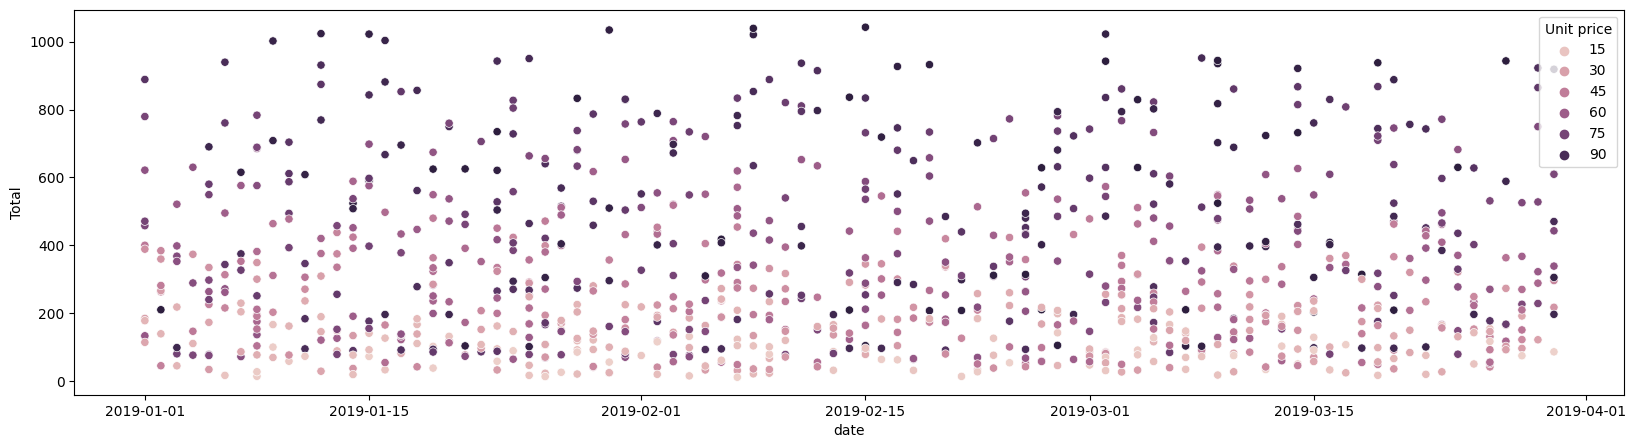

In [76]:
#Check the distribution of data points against date
fig, ax = plt.subplots(figsize=(20, 5))
sns.scatterplot(data = df_dt, x = "date", y = "Total", ax = ax, hue = "Unit price")

In [77]:
total_by_date = df_dt.groupby(["date"])[["Total", "gross income"]].sum()
total_by_date.reset_index(inplace = True)
total_by_date.head(3)

,date,Total,gross income
0,2019-01-01,4745.1810,225.9610
1,2019-01-02,1945.5030,92.6430
2,2019-01-03,2078.1285,98.9585


### Daily sum of invoice total

[Text(0.5, 1.0, 'Daily sum of total')]

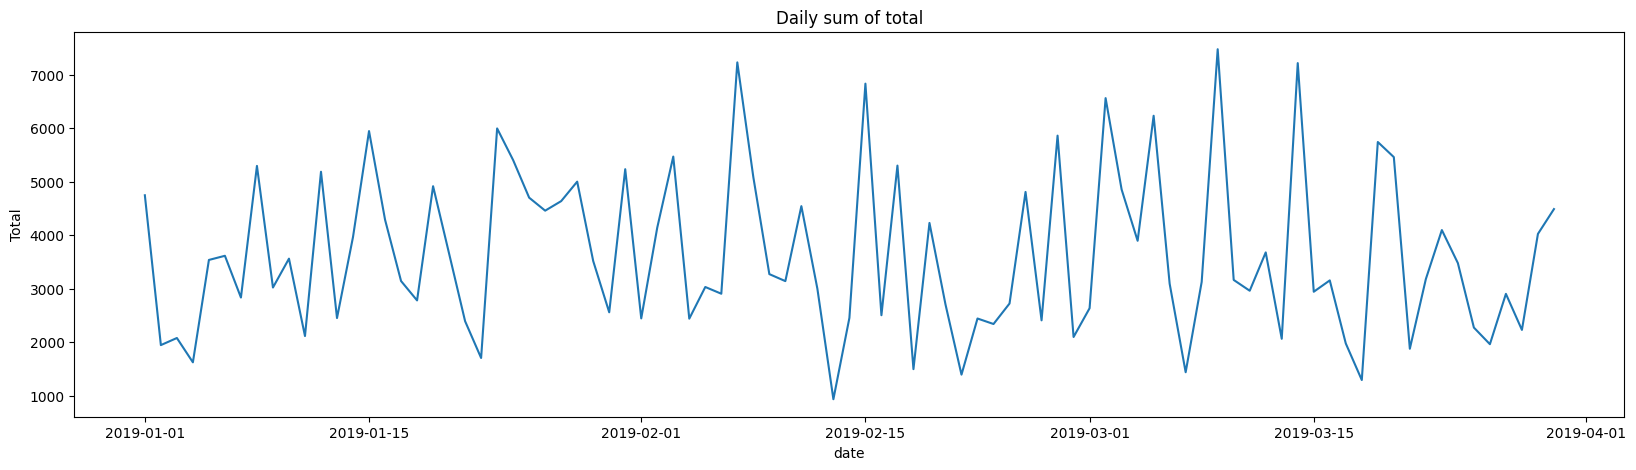

In [78]:
#Check the total income against date
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = total_by_date, x = "date", y = "Total", ax = ax).set(
    title = "Daily sum of total")

### Daily sum of gross income

[Text(0.5, 1.0, 'Daily sum of gross income')]

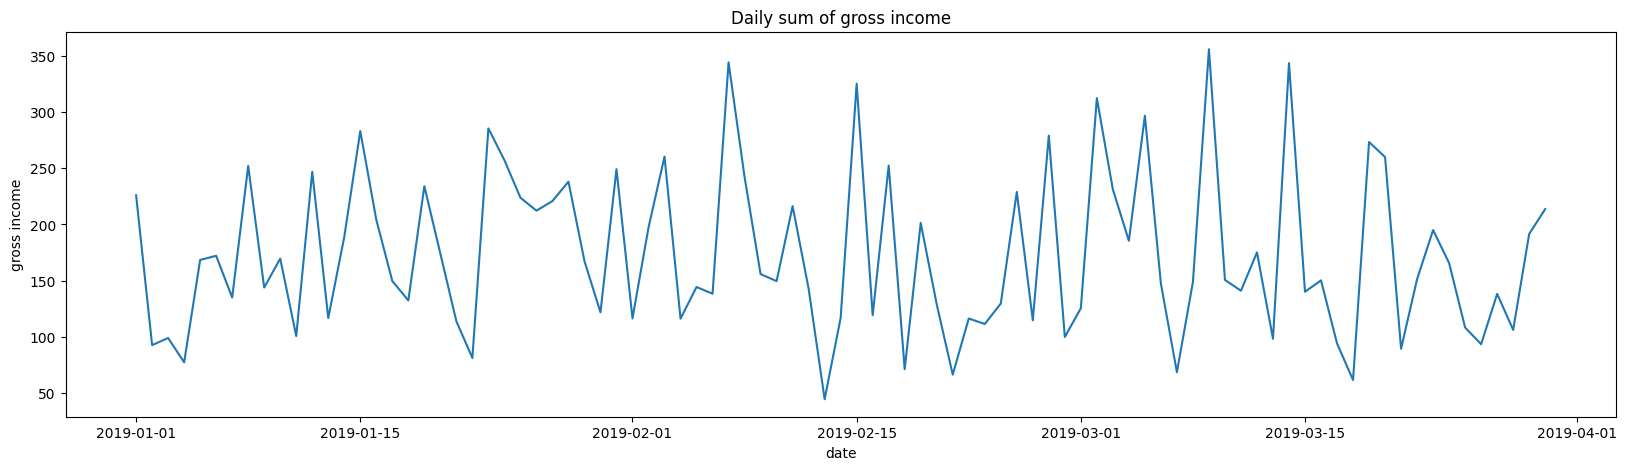

In [79]:
#Check the gross income against date
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = total_by_date, x = "date", y = "gross income", ax = ax).set(
    title = "Daily sum of gross income")

In [80]:
#Cumulative total
total_by_date["c_gross_income"]= np.cumsum(total_by_date["gross income"])
total_by_date.head(5)                         

,date,Total,gross income,c_gross_income
0,2019-01-01,4745.1810,225.9610,225.9610
1,2019-01-02,1945.5030,92.6430,318.6040
2,2019-01-03,2078.1285,98.9585,417.5625
3,2019-01-04,1623.6885,77.3185,494.8810
4,2019-01-05,3536.6835,168.4135,663.2945


### Cumulative gross income

[Text(0.5, 1.0, 'Cumulative gross income ')]

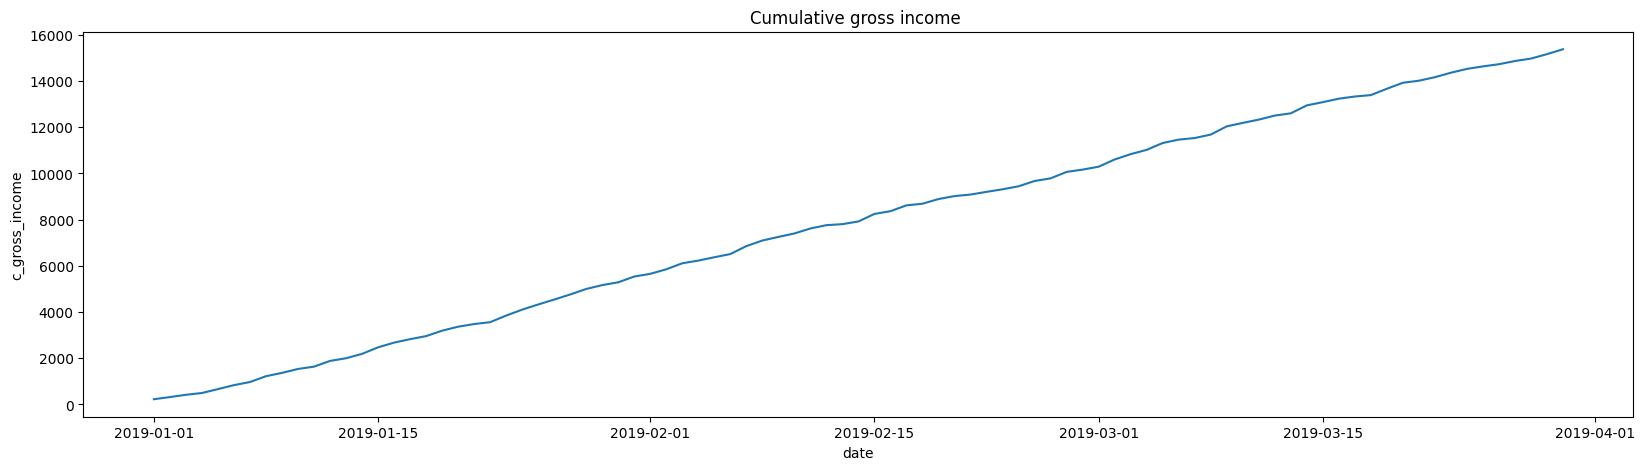

In [81]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = total_by_date, x = "date", y = "c_gross_income", ax = ax).set(title = "Cumulative gross income ")

In [82]:
df_dt_mandalay = df_dt.loc[df_dt["City"] == "Mandalay"].groupby("date")[["Total", "gross income"]].sum()
df_dt_mandalay.reset_index(inplace=True)
df_dt_mandalay.head(5)

,date,Total,gross income
0,2019-01-01,1536.6960,73.1760
1,2019-01-02,1162.8015,55.3715
2,2019-01-03,1016.6940,48.4140
3,2019-01-04,510.5835,24.3135
4,2019-01-05,486.7590,23.1790


### Cumulative gross income of Mandalay

[Text(0.5, 1.0, 'Cumulative gross income ')]

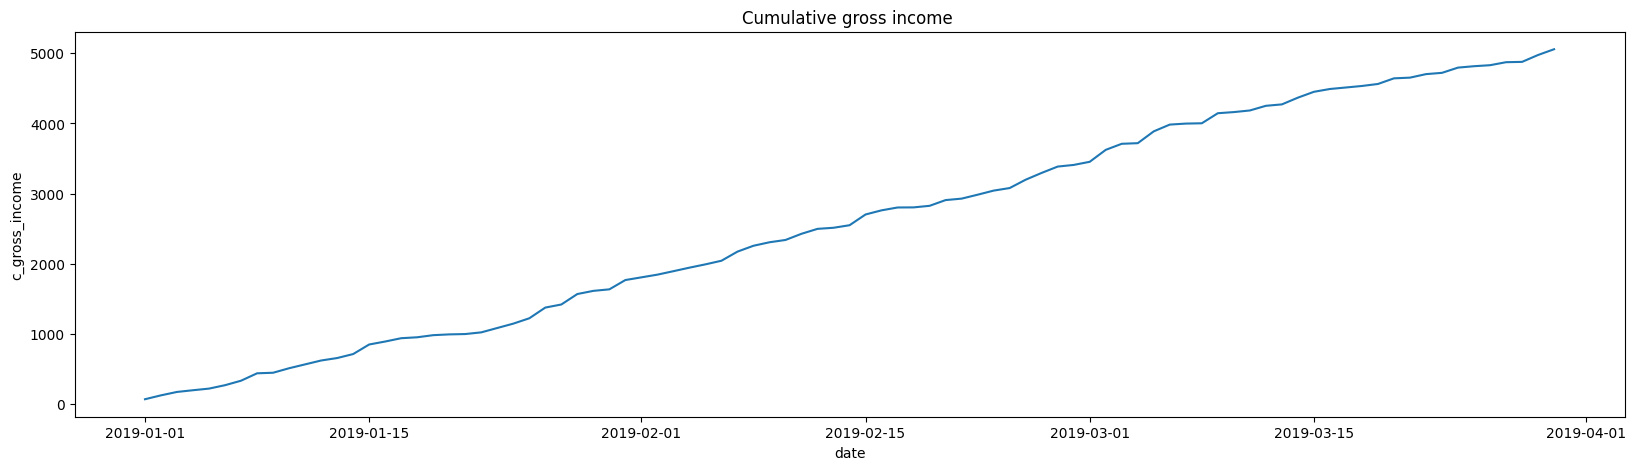

In [83]:
#Cumulative total Mandalay
df_dt_mandalay["c_gross_income"]= np.cumsum(df_dt_mandalay["gross income"])
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = df_dt_mandalay, x = "date", y = "c_gross_income", ax = ax).set(title = "Cumulative gross income ") 

In [84]:
df_dt_naypyitaw = df_dt.loc[df_dt["City"] == "Naypyitaw"].groupby("date")[["Total", "gross income"]].sum()
df_dt_naypyitaw.reset_index(inplace=True)
df_dt_naypyitaw.head(5)

,date,Total,gross income
0,2019-01-01,837.1650,39.8650
1,2019-01-02,475.6500,22.6500
2,2019-01-03,124.0260,5.9060
3,2019-01-04,629.8425,29.9925
4,2019-01-05,1025.4195,48.8295


### Cumulative gross income of Naypyitaw

[Text(0.5, 1.0, 'Cumulative gross income ')]

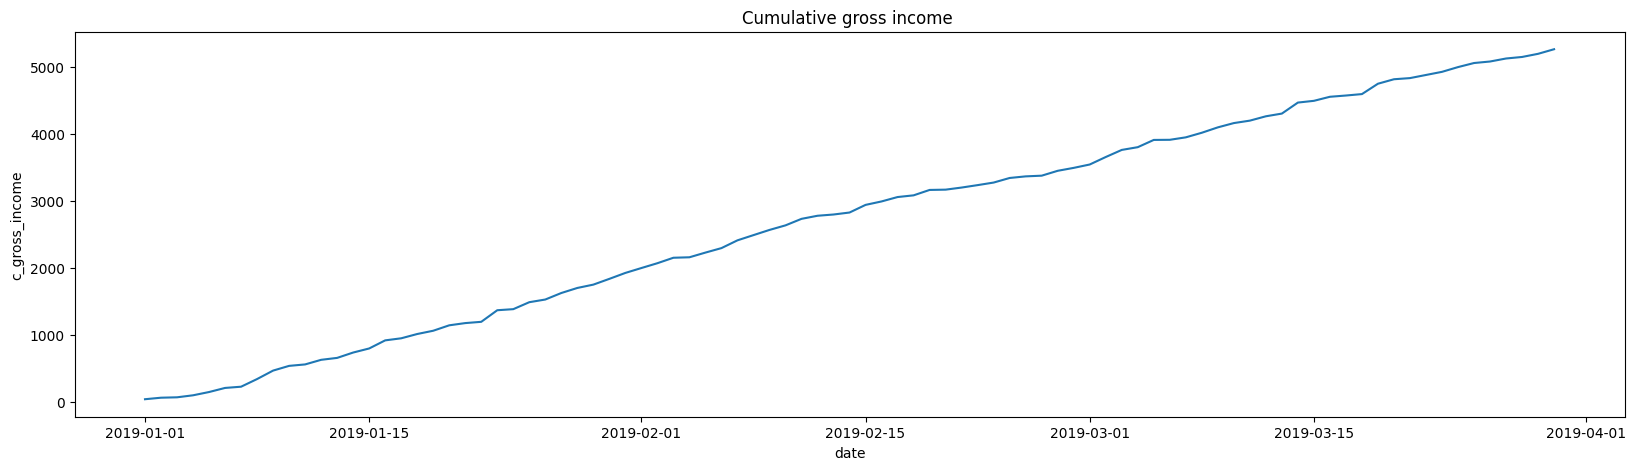

In [85]:
#Cumulative total Naypyitaw
df_dt_naypyitaw["c_gross_income"]= np.cumsum(df_dt_naypyitaw["gross income"])
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = df_dt_naypyitaw, x = "date", y = "c_gross_income", ax = ax).set(title = "Cumulative gross income ") 

In [86]:
df_dt_yangon = df_dt.loc[df_dt["City"] == "Yangon"].groupby("date")[["Total", "gross income"]].sum()
df_dt_yangon.reset_index(inplace=True)
df_dt_yangon.head(5)

,date,Total,gross income
0,2019-01-01,2371.3200,112.9200
1,2019-01-02,307.0515,14.6215
2,2019-01-03,937.4085,44.6385
3,2019-01-04,483.2625,23.0125
4,2019-01-05,2024.5050,96.4050


### Cumulative gross income of Yangon

[Text(0.5, 1.0, 'Cumulative gross income ')]

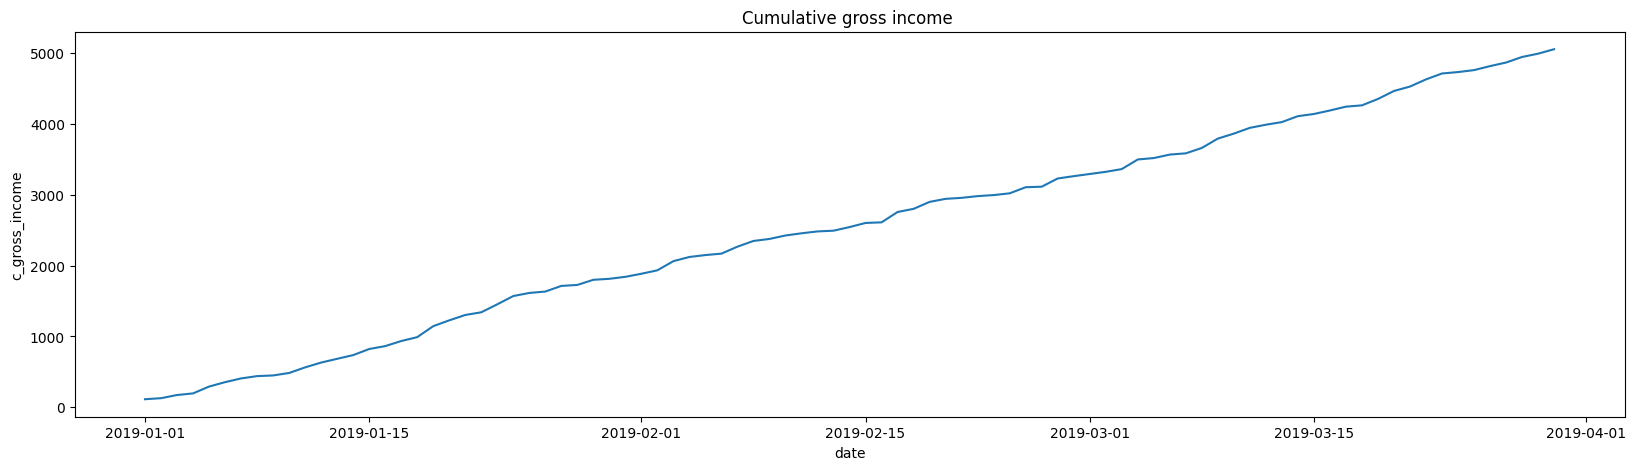

In [87]:
#Cumulative total Yangon
df_dt_yangon["c_gross_income"]= np.cumsum(df_dt_yangon["gross income"])
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = df_dt_yangon, x = "date", y = "c_gross_income", ax = ax).set(title = "Cumulative gross income ") 

* Because of the fixed tax rate and lack of margine the fluctuation patterns of daily sum of gross income and daily sum of invoice total trends are similarly shaped. 

* Daily sum of gross income might be an interesting field to analyze further because of the fluctuations.

* Overall cumulative gross income as well as cumulative gross income of each city show a trend of linear steady increase.

## 9. When (time, month, day) are people more likely to make purchases? Higher revenue

In [88]:
type(df_dt.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [89]:
#type(df_dt.time[0])

In [90]:
type(df_dt.date_time[0])

pandas._libs.tslibs.timestamps.Timestamp

[Text(0.5, 1.0, 'Daily sum of gross income')]

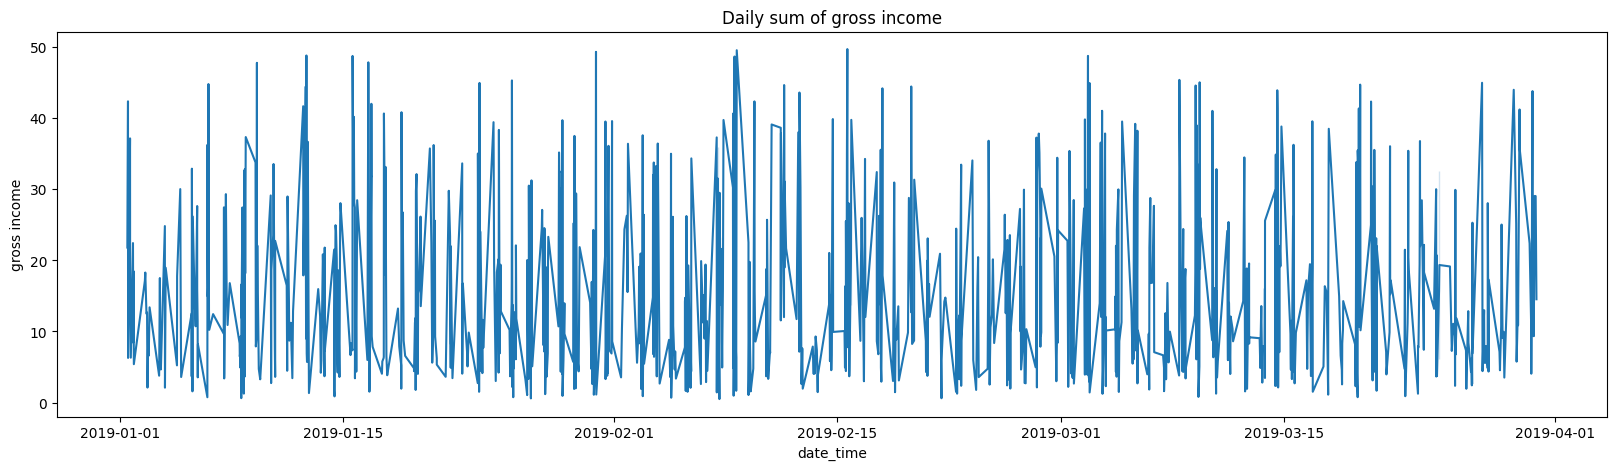

In [91]:
#Check the gross income against date and time
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = df_dt, x = "date_time", y = "gross income", ax = ax).set(
    title = "Daily sum of gross income")

### the day of the week people are most likely to purchase/ the supermarket is most likely to make revenue.

In [92]:
# the day of the week people are most likely to purchase/ the supermarket is most likely to make revenue.
day_of_week = df_dt.copy()

dow_list = []
for line in day_of_week["date_time"]:
     dow_list.append(line.day_of_week)
day_of_week["dow"] = dow_list
day_of_week.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,time,date_time,dow
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,...,10:39,Credit card,435.66,4.761905,21.783,6.9,2019-01-01,10:39:00,2019-01-01 10:39:00,1
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,...,11:36,Credit card,846.30,4.761905,42.315,9.0,2019-01-01,11:36:00,2019-01-01 11:36:00,1
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,...,11:40,Ewallet,175.32,4.761905,8.766,5.0,2019-01-01,11:40:00,2019-01-01 11:40:00,1


In [93]:
type(day_of_week["dow"][3])
day_of_week["dow"].replace({
    1 : "Tue",
    2 : "Wed",
    3 : "Thu",
    4 : "Fri",
    5 : "Sat",
    6 : "Sun",
    0 : "Mon"
}, inplace = True)
day_of_week.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,time,date_time,dow
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,...,10:39,Credit card,435.66,4.761905,21.783,6.9,2019-01-01,10:39:00,2019-01-01 10:39:00,Tue
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,...,11:36,Credit card,846.30,4.761905,42.315,9.0,2019-01-01,11:36:00,2019-01-01 11:36:00,Tue
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,...,11:40,Ewallet,175.32,4.761905,8.766,5.0,2019-01-01,11:40:00,2019-01-01 11:40:00,Tue


In [94]:
dow_income = day_of_week.groupby("dow")[["gross income"]].sum()
dow_income.reset_index(inplace=True)
dow_income
#day_of_week["dow"].value_counts()

,dow,gross income
0,Fri,2091.7305
1,Mon,1804.7180
2,Sat,2672.4195
3,Sun,2117.0425
4,Thu,2159.4880
5,Tue,2451.5355
6,Wed,2082.4350


In [95]:
dow_income.sort_values(by=["gross income"])

,dow,gross income
1,Mon,1804.7180
6,Wed,2082.4350
0,Fri,2091.7305
3,Sun,2117.0425
4,Thu,2159.4880
5,Tue,2451.5355
2,Sat,2672.4195


[Text(0.5, 1.0, 'Sum of gross income by day of week')]

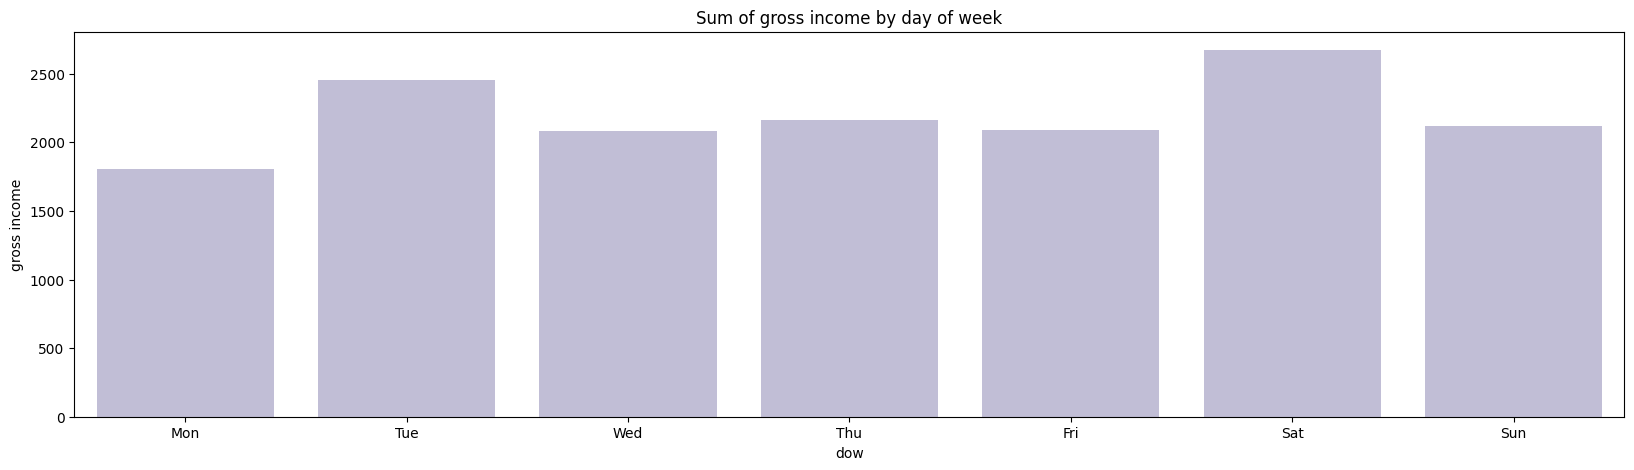

In [96]:
#["Mon","Tue","Wed", "Thu", "Fri", "Sat","Sun"]
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(
    data = dow_income, 
    x = "dow", 
    y = "gross income", 
    color = cat_palette[2], 
    order = ["Mon","Tue","Wed", "Thu", "Fri", "Sat","Sun"],
    ax = ax).set(
    title = "Sum of gross income by day of week")

In [97]:
#day_of_week["dow"].value_counts().reindex(["Mon","Tue","Wed", "Thu", "Fri", "Sat","Sun"]).plot(
#    kind="bar", color = cat_palette[2], title = "")

* The supermarket sales occuer all 7 days of the week. (Check whether this is consistant for all three locations)

* When considering total gross income by day of the week,the highest total revenue was made on Saturday, closely followed by Tuesday.

* The lowest total revenue was made on Monday 


### For each city, the day of the week people are most likely to purchase/ the supermarket is most likely to make revenue.

In [98]:
dow_income_city = day_of_week.groupby(["dow","City"])[["gross income"]].sum()
dow_income_city.reset_index(inplace=True)
dow_income_city

,dow,City,gross income
0,Fri,Mandalay,686.5600
1,Fri,Naypyitaw,712.6055
2,Fri,Yangon,692.5650
3,Mon,Mandalay,606.4145
4,Mon,Naypyitaw,520.2530
5,Mon,Yangon,678.0505
6,Sat,Mandalay,1013.5440
7,Sat,Naypyitaw,860.5225
8,Sat,Yangon,798.3530
9,Sun,Mandalay,495.9680


[Text(0.5, 1.0, 'Sum of gross income by day of week and city'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Total gross income')]

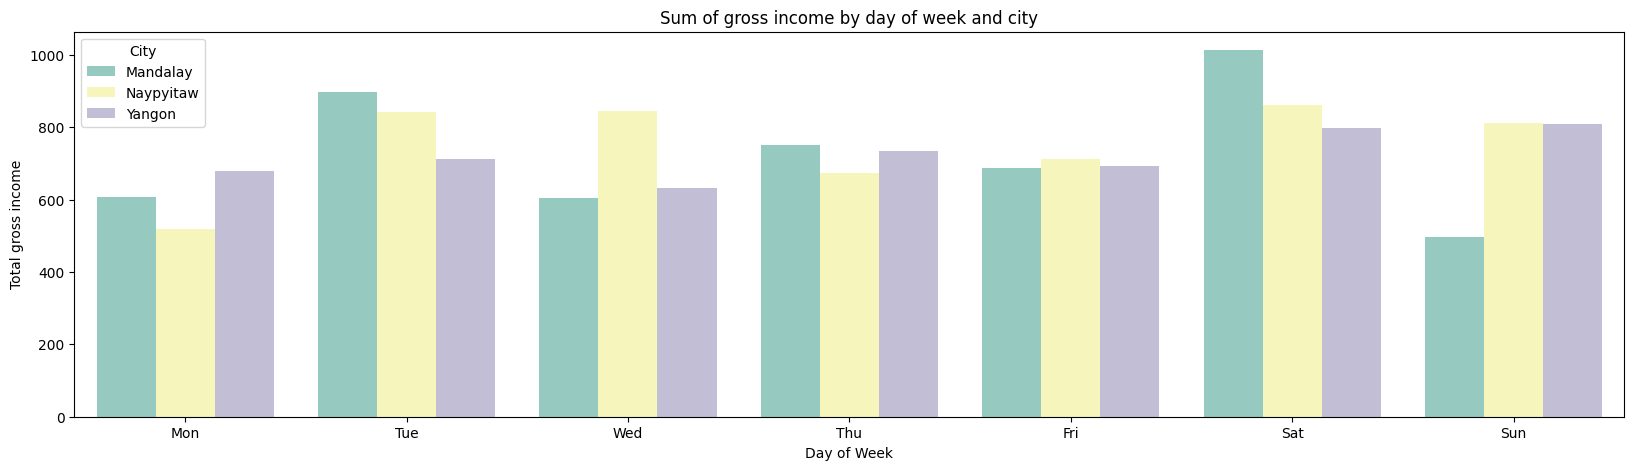

In [99]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(
    data = dow_income_city, 
    x = "dow", 
    y = "gross income",
    hue = "City",
    palette = cat_palette, 
    order = ["Mon","Tue","Wed", "Thu", "Fri", "Sat","Sun"],
    ax = ax).set(
    title = "Sum of gross income by day of week and city",
    xlabel = "Day of Week",
    ylabel = "Total gross income"
)
#sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

    * Lowest sales for Mandalay is Sunday

    * Lowest sales for Naypyitaw is Monday

    * Lowest sales for Yangon is Wednesday

    * Highest sales for Mandalay is Saturday

    * Highest sales for Naypyitaw is Saturday

    * Highest sales for Yangon is Sunday



* Because of this it is hard to generaize a particular day of week as the day with highest or lowest revenue.

* One must also consider that this dataset is not a raw dataset and is already cleaned to be balanced for an unknown analysis.



### the time of day people are most likely to purchase/ the supermarket is most likely to make revenue.

In [100]:
df_dt.head(2)
df_dt["date_time"][0].hour

13

In [101]:
hour_of_day = df_dt.copy()

hod_list = []
for line in hour_of_day["date_time"]:
     hod_list.append(line.hour)
hour_of_day["hod"] = hod_list
hour_of_day.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,time,date_time,hod
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,...,10:39,Credit card,435.66,4.761905,21.783,6.9,2019-01-01,10:39:00,2019-01-01 10:39:00,10
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,...,11:36,Credit card,846.30,4.761905,42.315,9.0,2019-01-01,11:36:00,2019-01-01 11:36:00,11
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,...,11:40,Ewallet,175.32,4.761905,8.766,5.0,2019-01-01,11:40:00,2019-01-01 11:40:00,11


In [102]:
hod_income = hour_of_day.groupby("hod")[["gross income"]].sum()
hod_income.reset_index(inplace=True)
hod_income

,hod,gross income
0,10,1496.2610
1,11,1446.5395
2,12,1241.2325
3,13,1653.4870
4,14,1468.0190
5,15,1484.7385
6,16,1201.2535
7,17,1164.0580
8,18,1239.5400
9,19,1890.4530


[Text(0.5, 1.0, 'Sum of gross income by hour of day')]

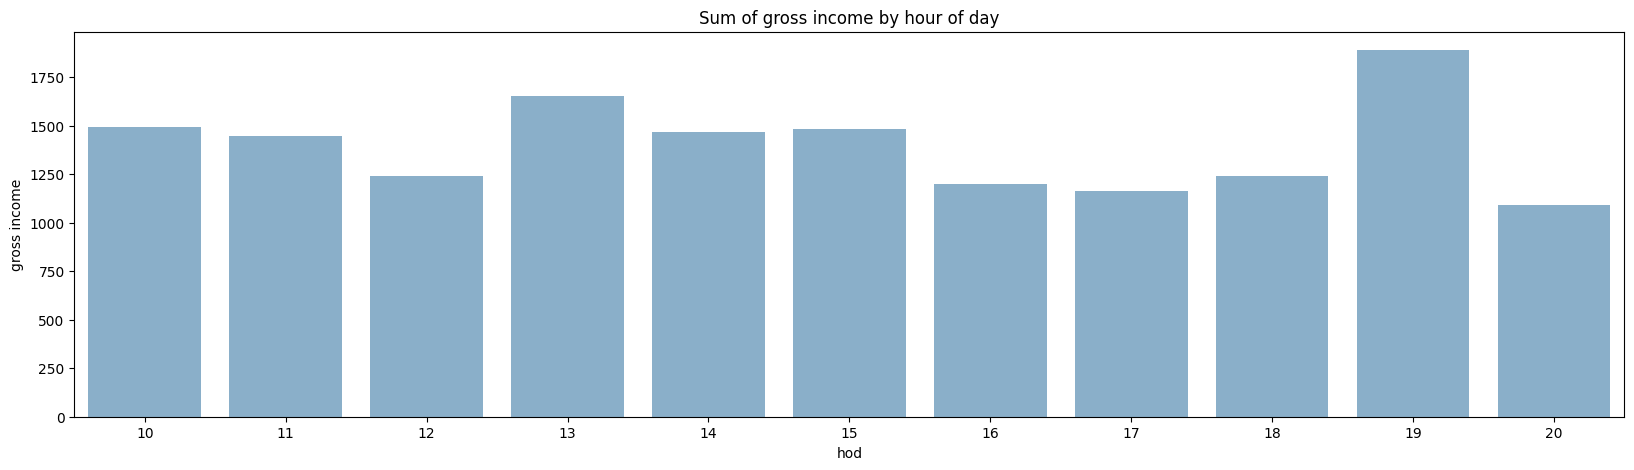

In [103]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(
    data = hod_income, 
    x = "hod", 
    y = "gross income", 
    color = cat_palette[4], 
    #order = ["Mon","Tue","Wed", "Thu", "Fri", "Sat","Sun"],
    ax = ax).set(
    title = "Sum of gross income by hour of day")

In [104]:
hod_income_city = hour_of_day.groupby(["hod","City"])[["gross income"]].sum()
hod_income_city.reset_index(inplace=True)
hod_income_city.head(3)

,hod,City,gross income
0,10,Mandalay,422.183
1,10,Naypyitaw,540.344
2,10,Yangon,533.734


[Text(0.5, 1.0, 'Sum of gross income by hour of day and city'),
 Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Total gross income')]

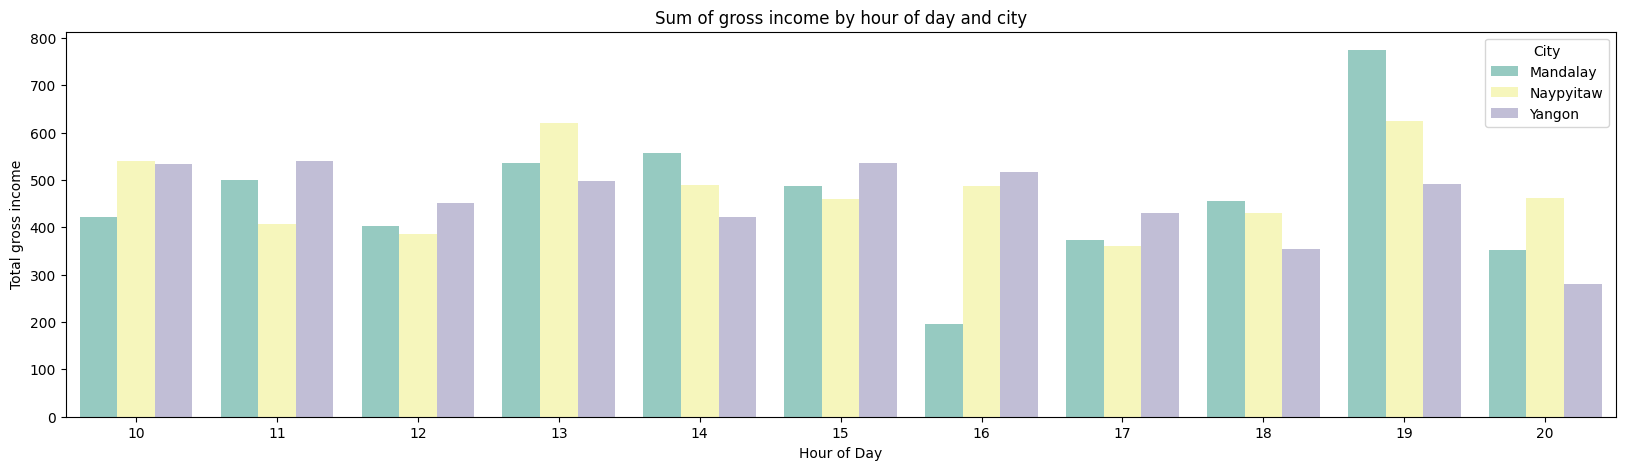

In [105]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(
    data = hod_income_city, 
    x = "hod", 
    y = "gross income",
    hue = "City",
    palette = cat_palette, 
    #order = ["Mon","Tue","Wed", "Thu", "Fri", "Sat","Sun"],
    ax = ax).set(
    title = "Sum of gross income by hour of day and city",
    xlabel = "Hour of Day",
    ylabel = "Total gross income"
)

* When considering total gross income of all three supermarkets by the hour of day, 19th hour is the highest and the 20th hour is the lowest.

When considering the total income by the hour of day of each supermarket seperately;

* For some reason Mandalay has a significanly low total gross income in the 16th hour (4 - 4.59 PM).
This is the lowest total gross income for any hour of all three cities.

* Mandalay also has a significantly high total gross income in the 19th hour ( 7 - 8 PM).
This is the highest total gross income for any hour of all three cities.




# Exploring the record uniqueness: Extension of Q1

In [106]:
#only 1000 records/rows
new_temp_df = df_dt.groupby(["Product line","Unit price","Branch","Payment","Gender"])[["Date"]].count()
new_temp_df.reset_index( inplace= True)
new_temp_df.Date.nunique()

1

Each record is unique to a combination of;

* "Product line","Unit price","Branch","Payment","Gender" or

* "Product line","Unit price","Branch","Payment","Customer type"
